# Creadit Score Predictor

## Overview

- Import the credit score dataset from [Kaggle](https://www.kaggle.com/datasets/conorsully1/credit-score)
- Perform exploratory data analysis to gain insights.
- Conduct feature engineering.
- Determine the appropriate model for the problem.
- Perform evaluation and fine-tuning to find the best model and parameters.

In [113]:
# Import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Import metrics and models from scikit-learn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Import additional metrics for evaluation
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, \
    f1_score, roc_auc_score, multilabel_confusion_matrix

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Ensure plots are displayed inline
%matplotlib inline

## Import Credit Score Dataset

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
# load dataset ke raw_data
# dataset can be downloaded from https://www.kaggle.com/datasets/conorsully1/credit-score
raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dibimbing_course/dataset/credit_score.csv')

<ipython-input-115-48c5d6bc0e57>:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dibimbing_course/dataset/credit_score.csv')


## Exploratory Data

In [116]:
raw.shape

(100000, 28)

In [117]:
raw.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [118]:
raw.head(20)

ID Customer_ID     Month             Name   Age          SSN  \
0   0x1602   CUS_0xd40   January    Aaron Maashoh    23  821-00-0265   
1   0x1603   CUS_0xd40  February    Aaron Maashoh    23  821-00-0265   
2   0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
3   0x1605   CUS_0xd40     April    Aaron Maashoh    23  821-00-0265   
4   0x1606   CUS_0xd40       May    Aaron Maashoh    23  821-00-0265   
5   0x1607   CUS_0xd40      June    Aaron Maashoh    23  821-00-0265   
6   0x1608   CUS_0xd40      July    Aaron Maashoh    23  821-00-0265   
7   0x1609   CUS_0xd40    August              NaN    23    #F%$D@*&8   
8   0x160e  CUS_0x21b1   January  Rick Rothackerj   28_  004-07-5839   
9   0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   
10  0x1610  CUS_0x21b1     March  Rick Rothackerj    28  004-07-5839   
11  0x1611  CUS_0x21b1     April  Rick Rothackerj    28  004-07-5839   
12  0x1612  CUS_0x21b1       May  Rick Rothackerj    28  004-07-5839   
13  0x1613  CUS_0x21b1      June  Rick Rothackerj    28  004-07-5839   
14  0x1614  CUS_0x21b1      July  Rick Rothackerj    28  004-07-5839   
15  0x1615  CUS_0x21b1    August  Rick Rothackerj    28  004-07-5839   
16  0x161a  CUS_0x2dbc   January           Langep    34  486-85-3974   
17  0x161b  CUS_0x2dbc  February              NaN    34  486-85-3974   
18  0x161c  CUS_0x2dbc     March           Langep    34  486-85-3974   
19  0x161d  CUS_0x2dbc     April           Langep    34  486-85-3974   

   Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   Scientist      19114.12            1824.843333                  3   
1   Scientist      19114.12                    NaN                  3   
2   Scientist      19114.12                    NaN                  3   
3   Scientist      19114.12                    NaN                  3   
4   Scientist      19114.12            1824.843333                  3   
5   Scientist      19114.12                    NaN                  3   
6   Scientist      19114.12            1824.843333                  3   
7   Scientist      19114.12            1824.843333                  3   
8     _______      34847.84            3037.986667                  2   
9     Teacher      34847.84            3037.986667                  2   
10    Teacher     34847.84_            3037.986667                  2   
11    Teacher      34847.84                    NaN                  2   
12    Teacher      34847.84            3037.986667                  2   
13    Teacher      34847.84            3037.986667                  2   
14    Teacher      34847.84                    NaN                  2   
15    Teacher      34847.84            3037.986667                  2   
16    _______     143162.64           12187.220000                  1   
17   Engineer     143162.64           12187.220000                  1   
18    _______     143162.64                    NaN                  1   
19   Engineer     143162.64           12187.220000                  1   

    Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                 4              3           4   
1                 4              3           4   
2                 4              3           4   
3                 4              3           4   
4                 4              3           4   
5                 4              3           4   
6                 4              3           4   
7                 4              3           4   
8                 4              6           1   
9                 4              6           1   
10             1385              6           1   
11                4              6           1   
12                4              6           1   
13                4              6           1   
14                4              6           1   
15                4              6           1   
16                5              8           3   
17                5              8           3   
18         

We will set ID as index

In [119]:
# Set column 'ID' as the index
raw.set_index('ID', inplace=True)

We assume that the credit score of a customer from the previous month does not influence the credit score in the next month.

Therefore, we will drop columns [`Customer_ID`, `Name`, and `SSN`] as they are not correlated with the credit score.

In [120]:
drop_columns = ['Customer_ID', 'Month', 'Name', 'SSN']

for col in drop_columns:
    raw.drop(columns=col, inplace=True)

In [121]:
# Check the data type
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  

We alson want to convert all object-type columns containing numbers to numeric data types

Such as [`Age`, `Annual_Income`, `Num_of_Loan`, `Num_of_Delayed_Payment`, `Changed_Credit_Limit`, `Credit_Mix`, `Outstanding_Debt`, `Credit_History_Age`, `Payment_of_Min_Amount`, `Amount_invested_monthly`, `Monthly_Balance`]

In [122]:
should_be_numeric_columns = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance']

# Convert all object-type columns containing numbers to numeric data types
for column in should_be_numeric_columns:
    if pd.api.types.is_object_dtype(raw[column]):
        raw[column] = pd.to_numeric(raw[column], errors='coerce')

raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x1602 to 0x25fed
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       95061 non-null   float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             93020 non-null   float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               95215 non-null   float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    90254 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                0 non-null       

In [123]:
# # Split into X and y

# X = raw.loc[:, raw.columns != 'Credit_Score']
# y = raw['Credit_Score']

In [124]:
# Split into train and test
train, test = train_test_split(raw, test_size=0.2, shuffle=True, random_state=42)

## Feature Engineering

Here, we will conduct:
- Missing value handling
- One hot encoding
- feature scalling

### Handle Missing Value

In [125]:

# Print data type and number of unique values in each column

train.isnull().sum()

Age                          3990
Occupation                      0
Annual_Income                5546
Monthly_Inhand_Salary       11986
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  3771
Type_of_Loan                 9145
Delay_from_due_date             0
Num_of_Delayed_Payment       7797
Changed_Credit_Limit         1699
Num_Credit_Inquiries         1587
Credit_Mix                  80000
Outstanding_Debt              822
Credit_Utilization_Ratio        0
Credit_History_Age          80000
Payment_of_Min_Amount       80000
Total_EMI_per_month             0
Amount_invested_monthly      7007
Payment_Behaviour               0
Monthly_Balance               949
Credit_Score                    0
dtype: int64

We will handle missing values in the following columns:

 [`Age`, `Annual_Income`, `Monthly_Inhand_Salary`, `Num_of_Loan`, `Type_of_Loan`, `Num_of_Delayed_Payment`, `Changed_Credit_Limit`, `Num_Credit_Inquiries`, `Credit_Mix`, `Outstanding_Debt`, `Credit_History_Age`, `Payment_of_Min_Amount`, `Amount_invested_montly`, `Monthly_Balance`]

Rules:
- If the number of missing values is more than 20%, then we will drop the column.
- If the number of missing values is less than or equal to 20%, we will insert the mode of the data.

In [126]:

missing_value_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance']

num_of_row = train.shape[0]

dropped_columns = []

modes = train.mode()

for column in missing_value_columns:
    column_data = train[column]
    num_of_missing_value = column_data.isnull().sum()

    # If number of missing value > 20%, drop the column
    if num_of_missing_value / num_of_row > 0.2 :
        train.drop(columns=column, inplace=True)
        test.drop(columns=column, inplace=True)
        dropped_columns.append(column)
        continue

    mode = modes[column].values[0]
    train[column] = train[column].fillna(mode)
    test[column] = test[column].fillna(mode)


print('Dropped Columns: ')
print(dropped_columns)


Dropped Columns: 
['Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount']


In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80000 entries, 0x1cebe to 0x728d
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       80000 non-null  float64
 1   Occupation                80000 non-null  object 
 2   Annual_Income             80000 non-null  float64
 3   Monthly_Inhand_Salary     80000 non-null  float64
 4   Num_Bank_Accounts         80000 non-null  int64  
 5   Num_Credit_Card           80000 non-null  int64  
 6   Interest_Rate             80000 non-null  int64  
 7   Num_of_Loan               80000 non-null  float64
 8   Type_of_Loan              80000 non-null  object 
 9   Delay_from_due_date       80000 non-null  int64  
 10  Num_of_Delayed_Payment    80000 non-null  float64
 11  Changed_Credit_Limit      80000 non-null  float64
 12  Num_Credit_Inquiries      80000 non-null  float64
 13  Outstanding_Debt          80000 non-null  float64
 14  Cred

In [128]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0x1d1af to 0x10e80
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       20000 non-null  float64
 1   Occupation                20000 non-null  object 
 2   Annual_Income             20000 non-null  float64
 3   Monthly_Inhand_Salary     20000 non-null  float64
 4   Num_Bank_Accounts         20000 non-null  int64  
 5   Num_Credit_Card           20000 non-null  int64  
 6   Interest_Rate             20000 non-null  int64  
 7   Num_of_Loan               20000 non-null  float64
 8   Type_of_Loan              20000 non-null  object 
 9   Delay_from_due_date       20000 non-null  int64  
 10  Num_of_Delayed_Payment    20000 non-null  float64
 11  Changed_Credit_Limit      20000 non-null  float64
 12  Num_Credit_Inquiries      20000 non-null  float64
 13  Outstanding_Debt          20000 non-null  float64
 14  Cre

## Handle Outlier


In [129]:
def show_distribution_plots(data, cols):
    """
    Display three plots: histogram, Q-Q plot, and box plot for each columns

    Args:
        data (DataFrame): The input data
        cols (list): list of columns to be dislayed
    """
    for col in cols:
        plt.figure(figsize=(16, 4))
        plt.suptitle(col, fontsize=16)

        # histogram
        plt.subplot(1, 3, 1)
        sns.histplot(data[col], bins=30)
        plt.title('Histogram')

        # Q-Q plot
        plt.subplot(1, 3, 2)
        stats.probplot(data[col], dist="norm", plot=plt)
        plt.ylabel('Variable quantiles')

        # box plot
        plt.subplot(1, 3, 3)
        sns.boxplot(y=data[col])
        plt.title('Boxplot')

        # Adjust layout to prevent overlapping titles
        plt.tight_layout()

        plt.show()

In [130]:
numeric_columns = train.select_dtypes(include=['int', 'float']).columns

print('Numeric Columns: ')

numeric_columns

Numeric Columns: 


Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')

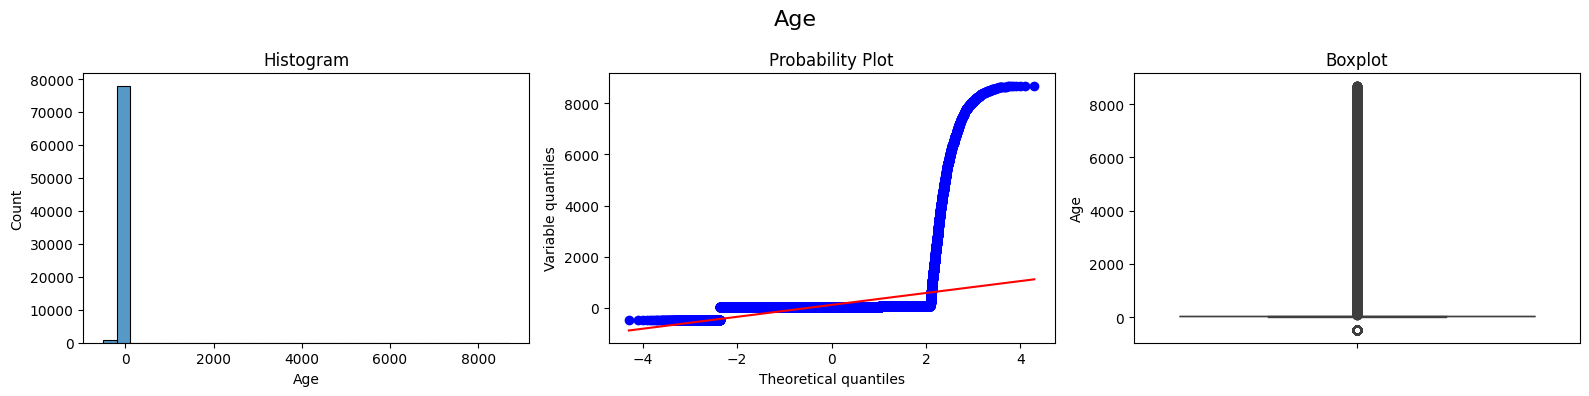

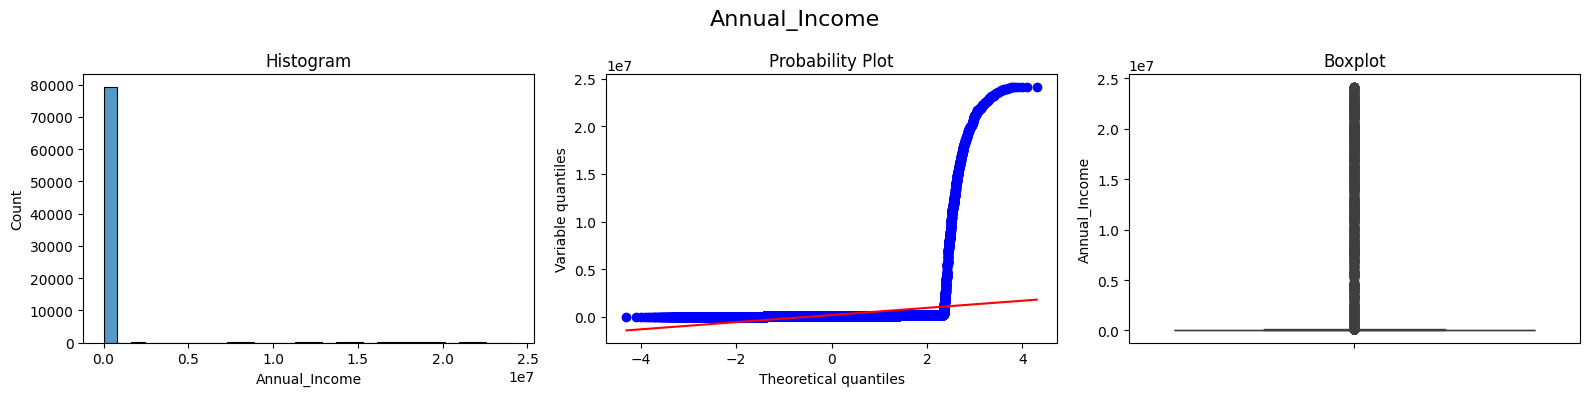

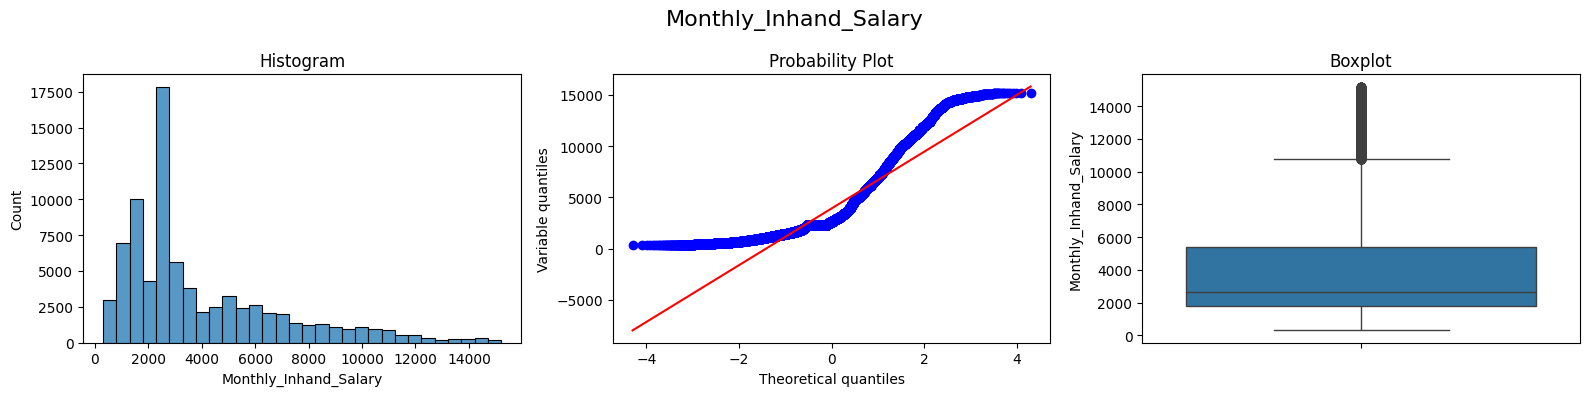

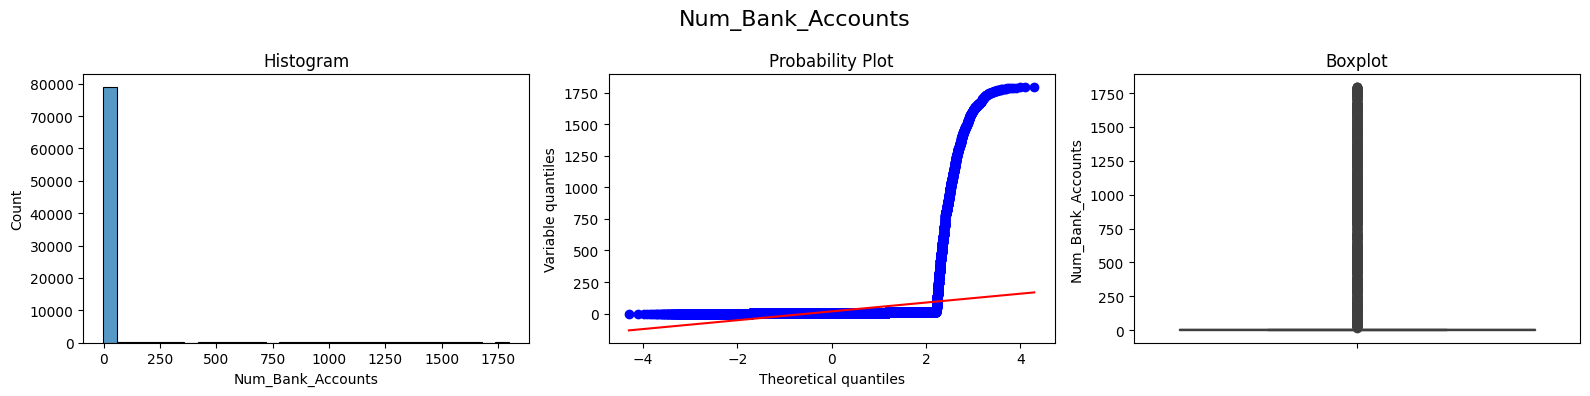

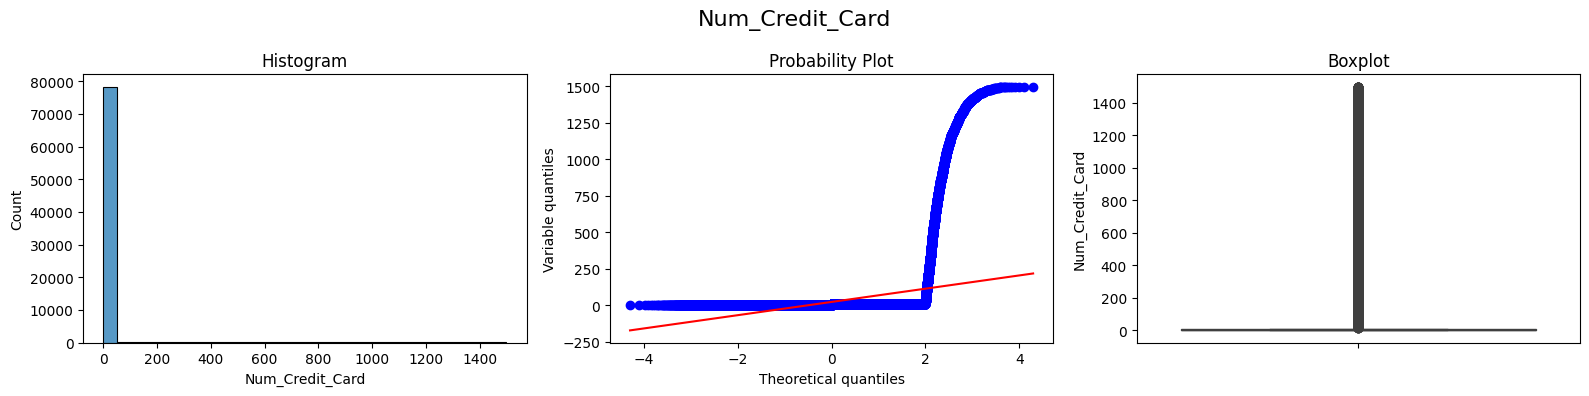

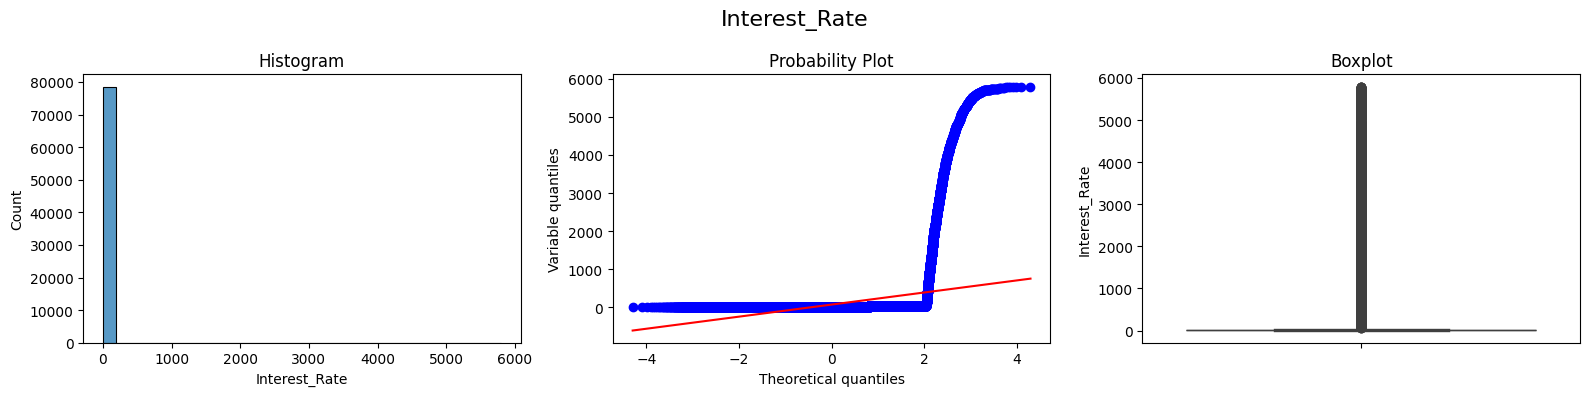

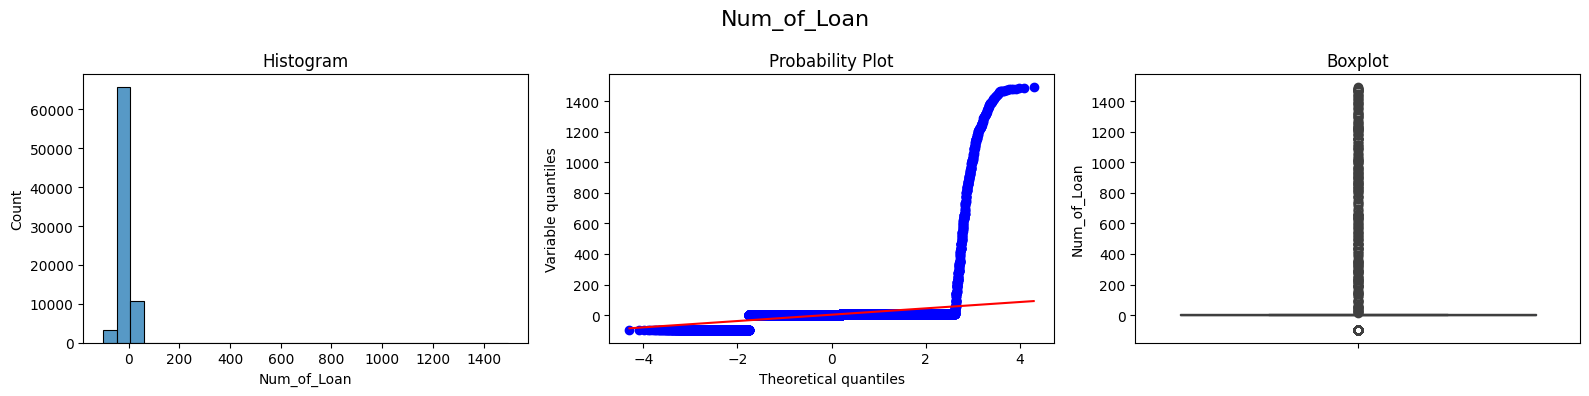

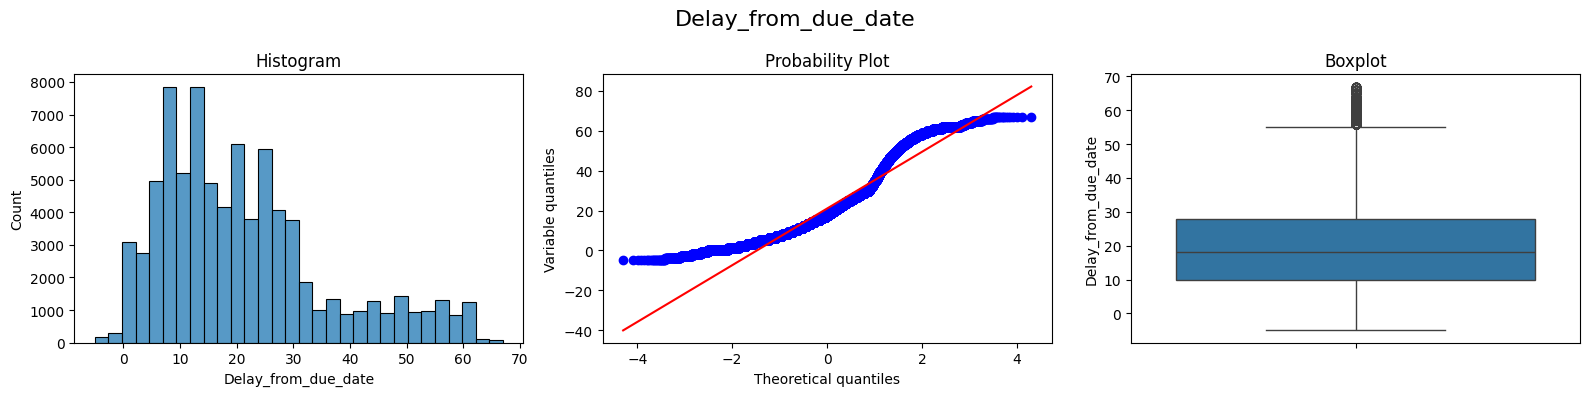

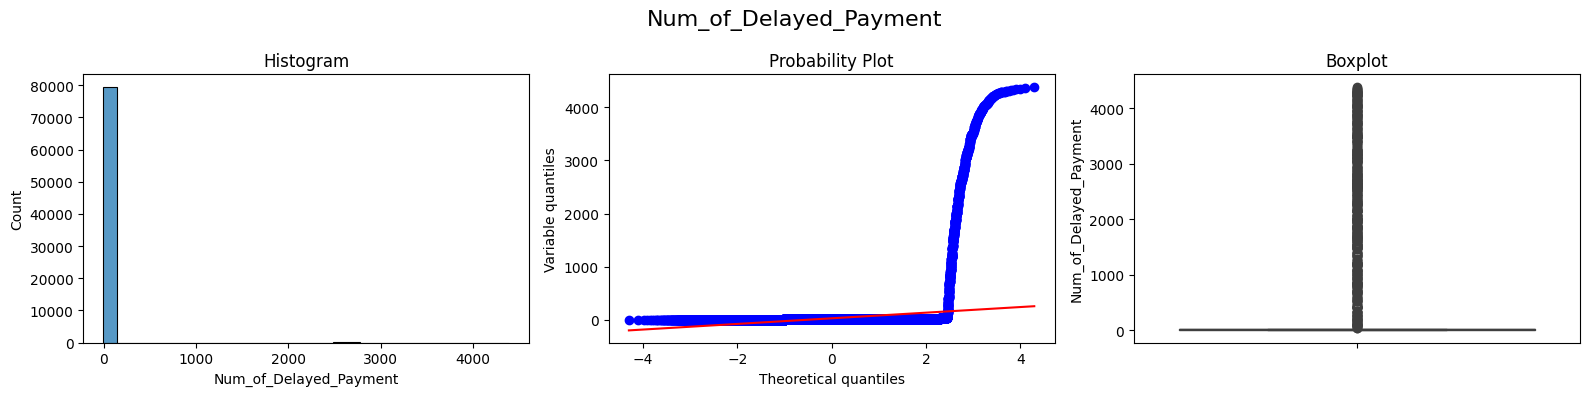

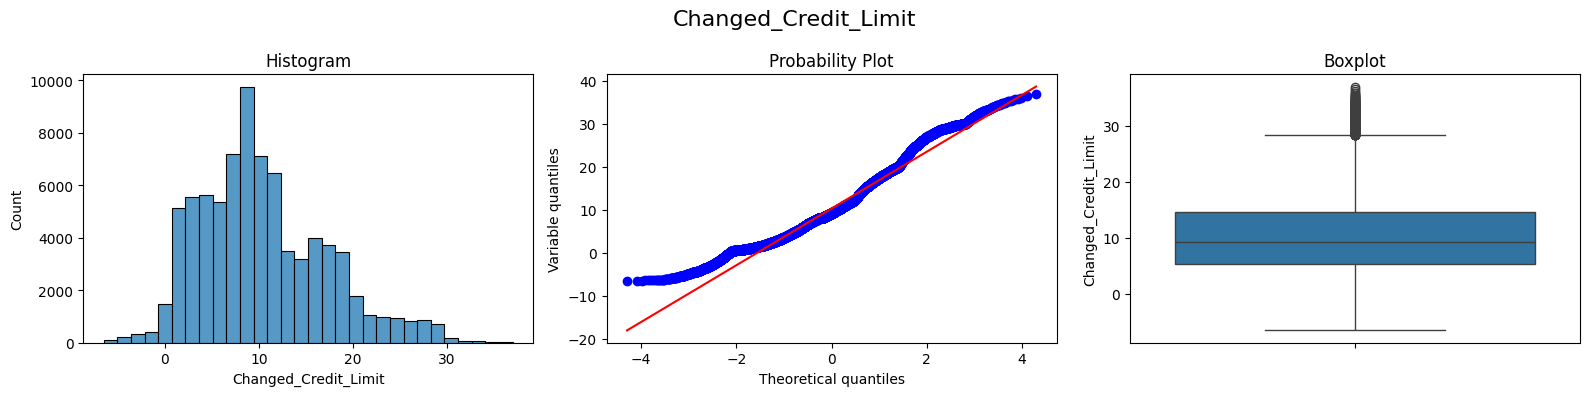

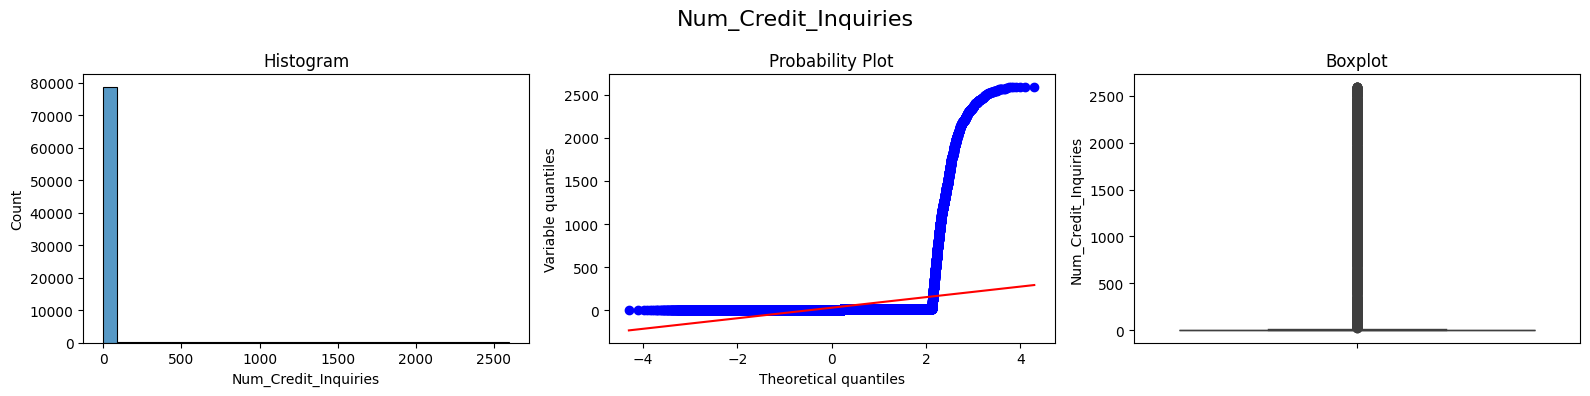

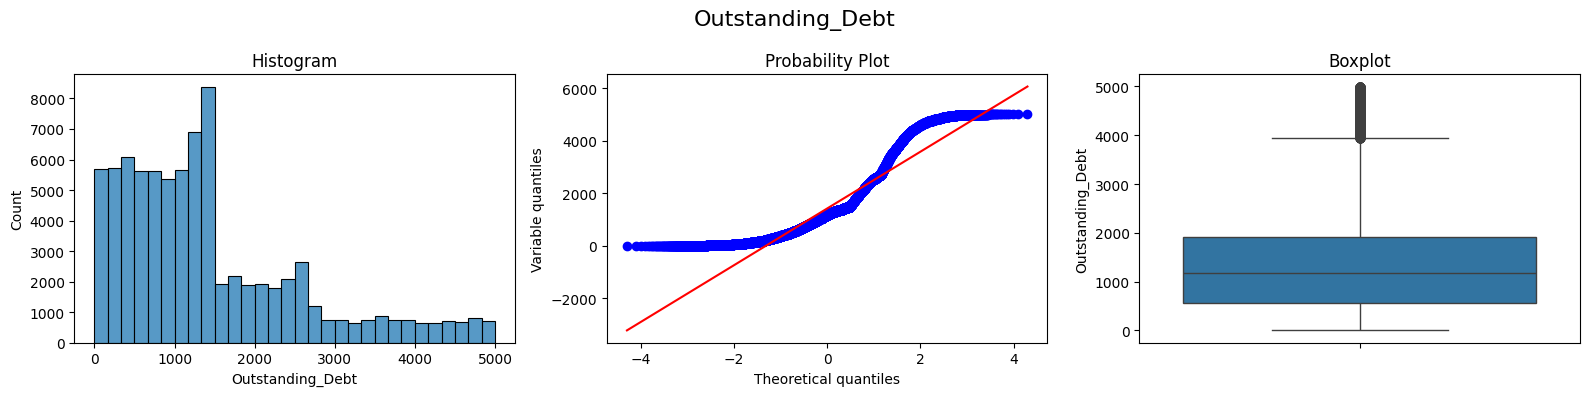

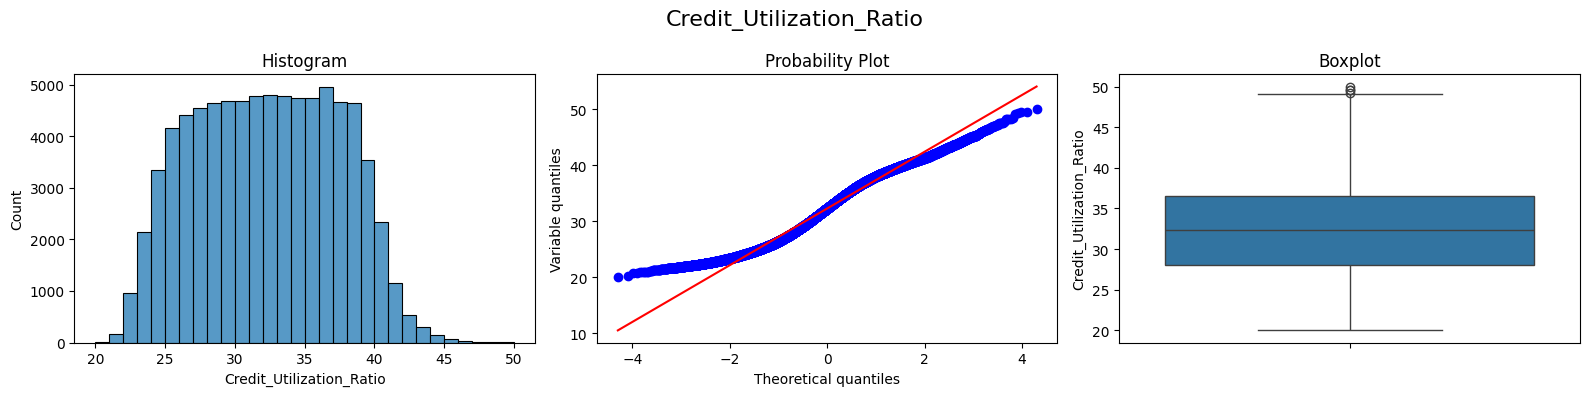

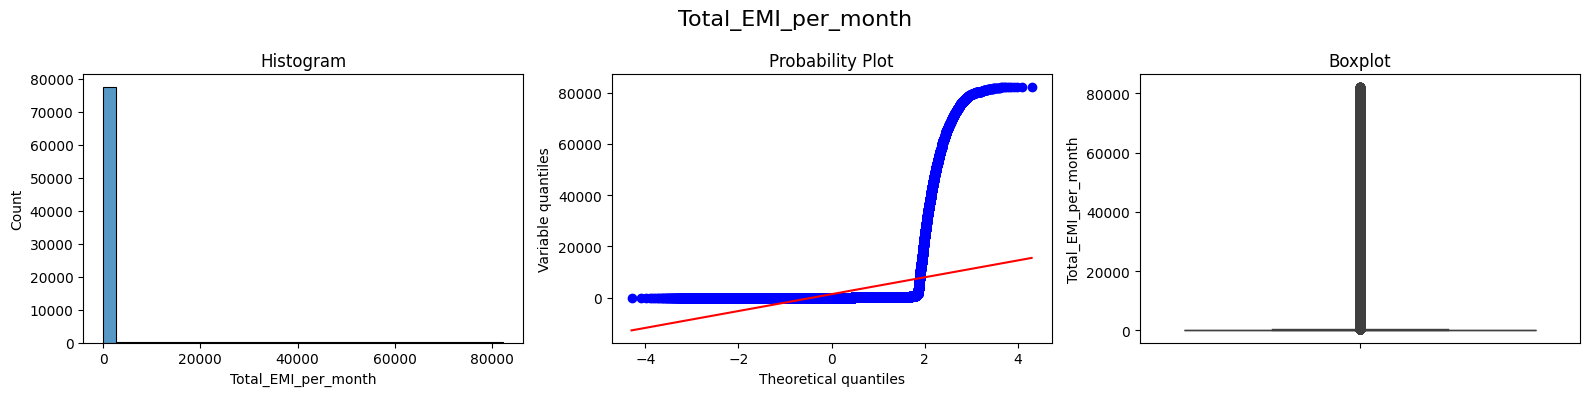

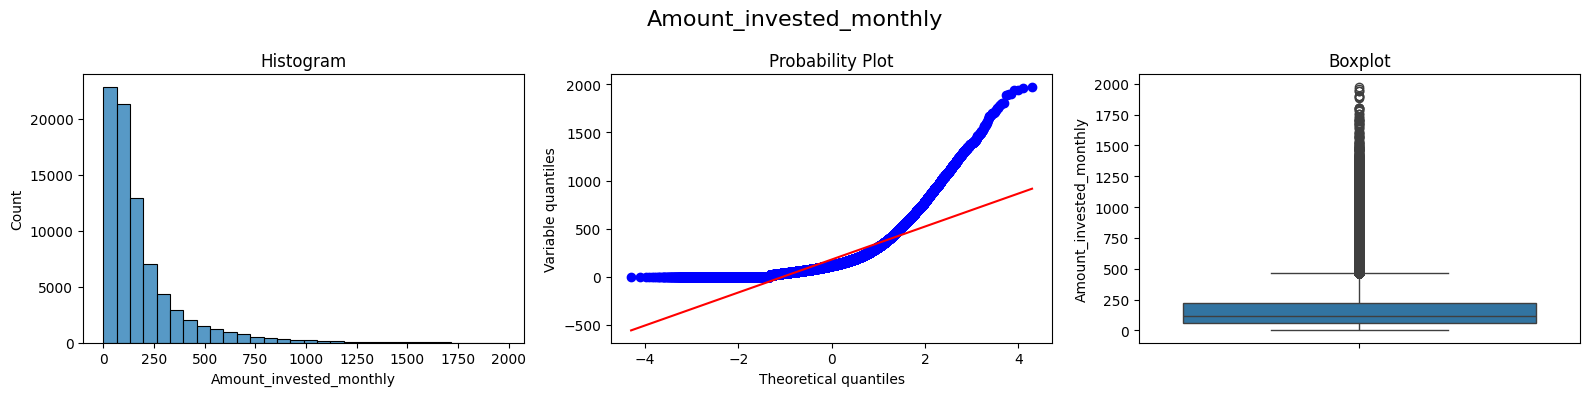

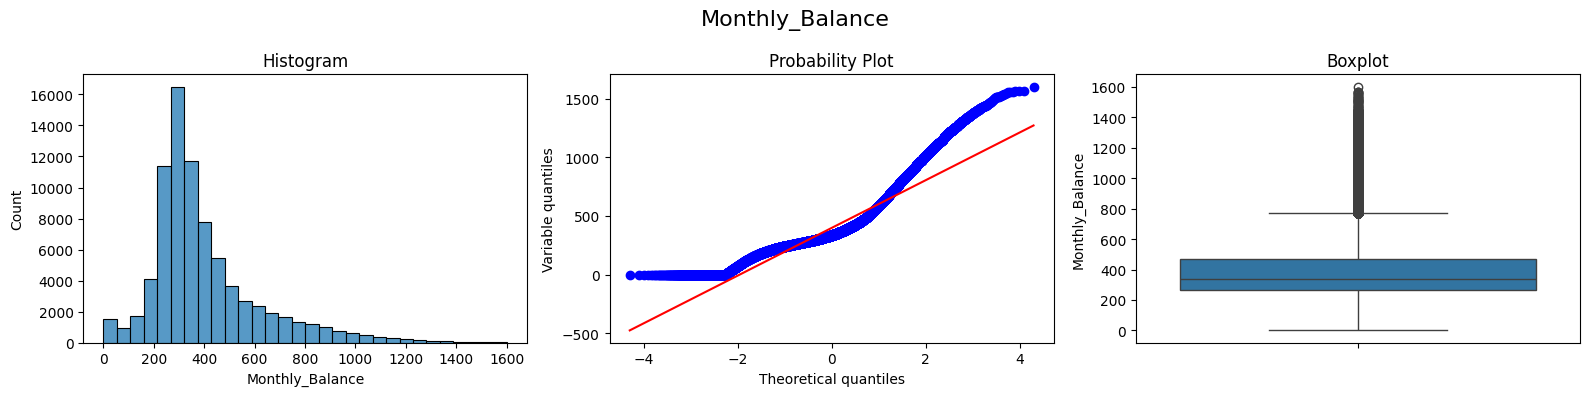

In [131]:
show_distribution_plots(train, numeric_columns)

We will use nterquartile range rule to handle outliers

Outliers are defined as data points that exceed Q3 + 1.5 IQR or fall below Q1 - 1.5 * IQR.

The rule will clip the outlier values to be within the range of these calculated boundaries.

In [132]:

class InterquartileOutlier:
    def __init__(self, custom_low_limit=None, custom_high_limit=None):
        """
        Initialize the InterquartileOutlier class.

        Args:
            custom_low_limit (float): Custom low limit for outlier detection.
            custom_high_limit (float): Custom high limit for outlier detection.
        """
        self.data = None
        self.custom_low_limit = custom_low_limit
        self.custom_high_limit = custom_high_limit
        self.q1 = None
        self.q3 = None
        self.iqr = None
        self.quartile_high_limit = None
        self.quartile_low_limit = None

    def fit(self, data):
        """
        Fit the data to calculate quartiles, IQR, and outlier limits.

        Args:
            data (pd.Series): The input data for fitting.
        """
        self.data = data
        self.q1, self.q3 = self.data.quantile([0.25, 0.75])
        self.iqr = self.q3 - self.q1
        self.quartile_high_limit = self.q3 + 1.5 * self.iqr
        self.quartile_low_limit = self.q1 - 1.5 * self.iqr

    def transform(self, data=None):
        """
        Transform the data by handling outliers.

        Args:
            data (pd.Series): The input data to be transformed. If None, the previously fitted data will be transformed.

        Returns:
            pd.Series: The transformed data with outliers handled.
        """
        if data is None:
            if self.data is None:
                raise ValueError("No data to transform. Call fit(data) or provide data to transform.")
            data = self.data

        high_limit = self.custom_high_limit if self.custom_high_limit is not None and self.custom_high_limit < self.quartile_high_limit else self.quartile_high_limit
        low_limit = self.custom_low_limit if self.custom_low_limit is not None and self.custom_low_limit > self.quartile_low_limit else self.quartile_low_limit

        # Clip values to the specified limits
        return np.clip(data, low_limit, high_limit)


In [133]:
for col in numeric_columns:

    custom_low_limit = None
    custom_high_limit = None
    # Clip age column in range between 17 and 90 as it is normal age of humen
    if col == 'Age':
        custom_low_limit = 17
        custom_high_limit = 90

    interquartile_outlier = InterquartileOutlier(custom_low_limit=custom_low_limit, custom_high_limit=custom_high_limit)
    interquartile_outlier.fit(train[col])

    train[col] = interquartile_outlier.transform(data=train[col])
    test[col] = interquartile_outlier.transform(data=test[col])

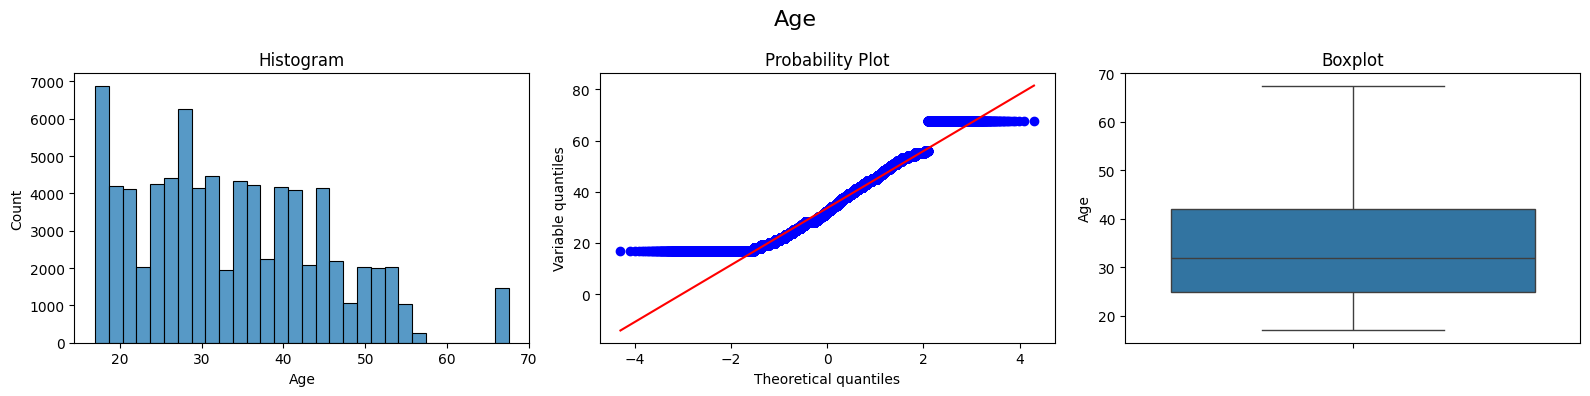

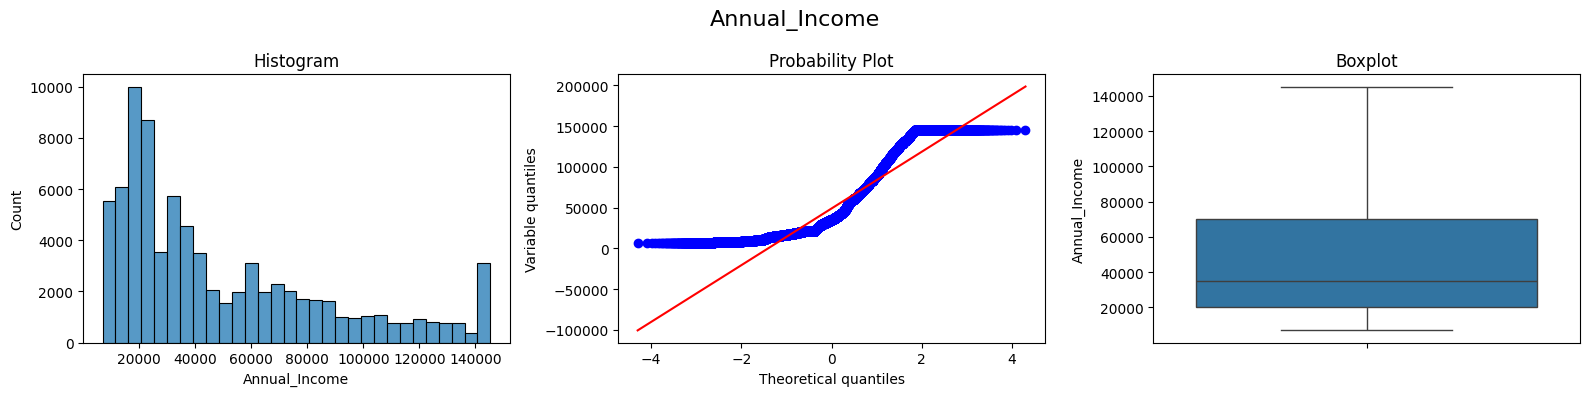

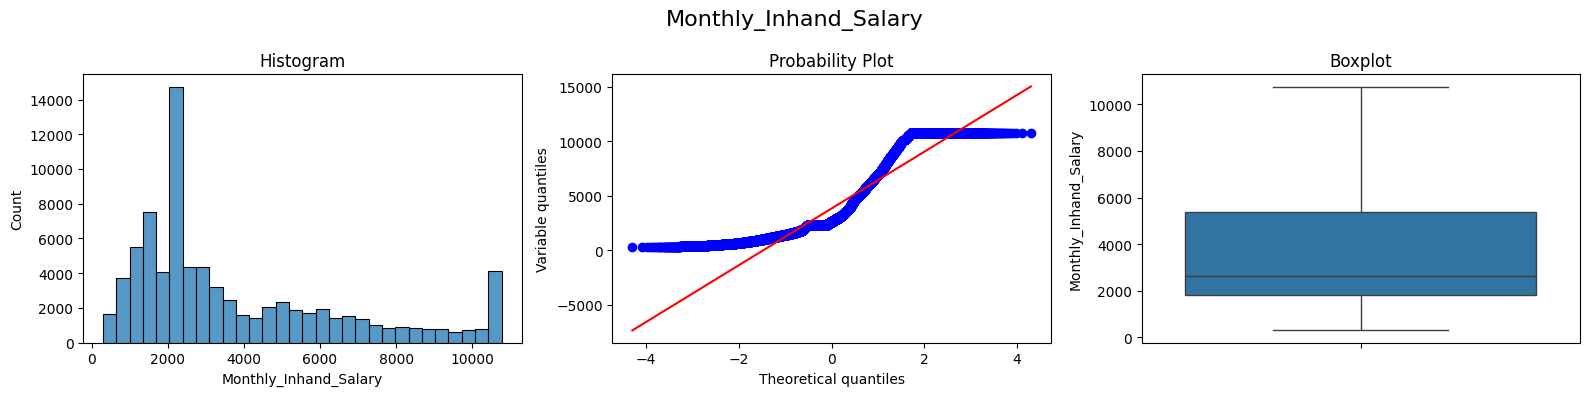

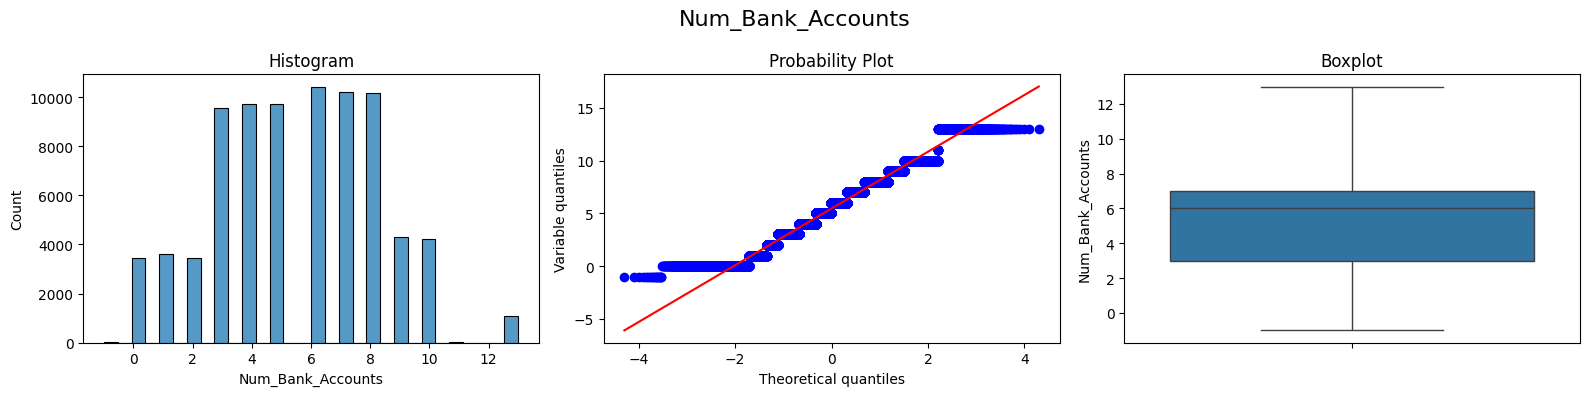

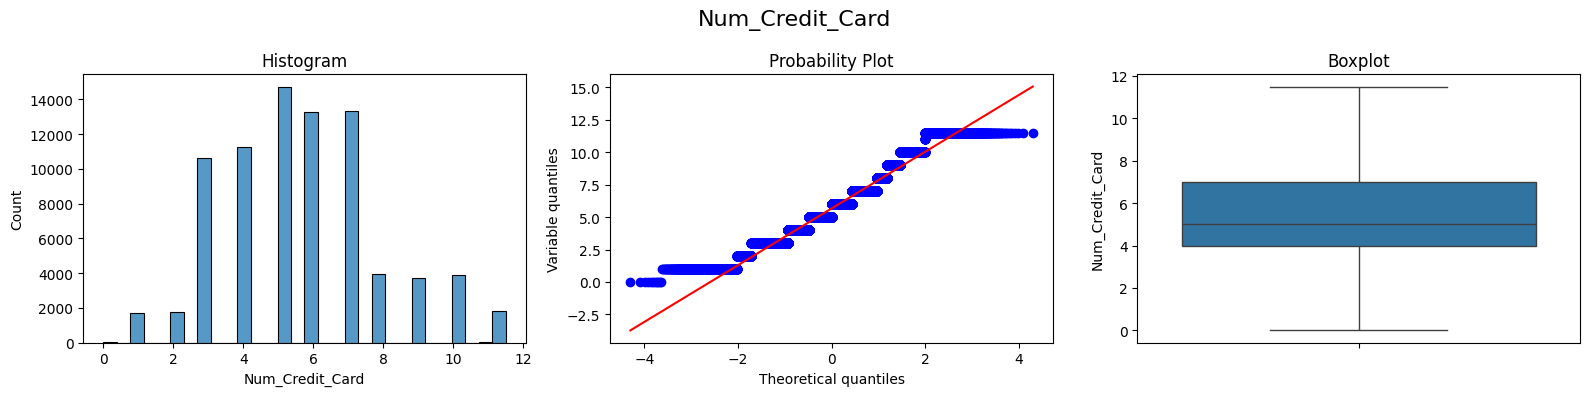

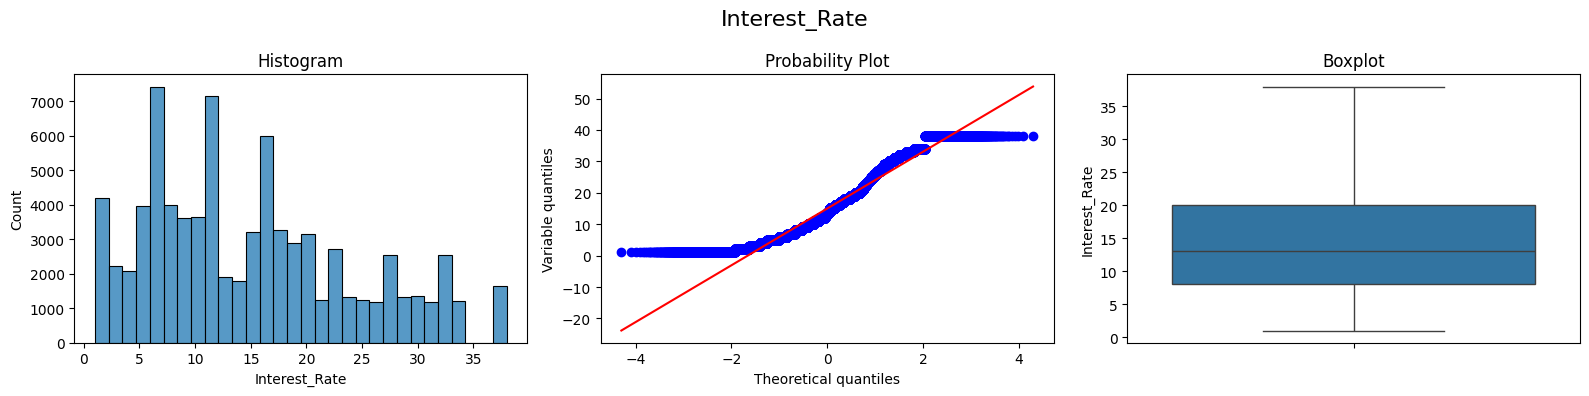

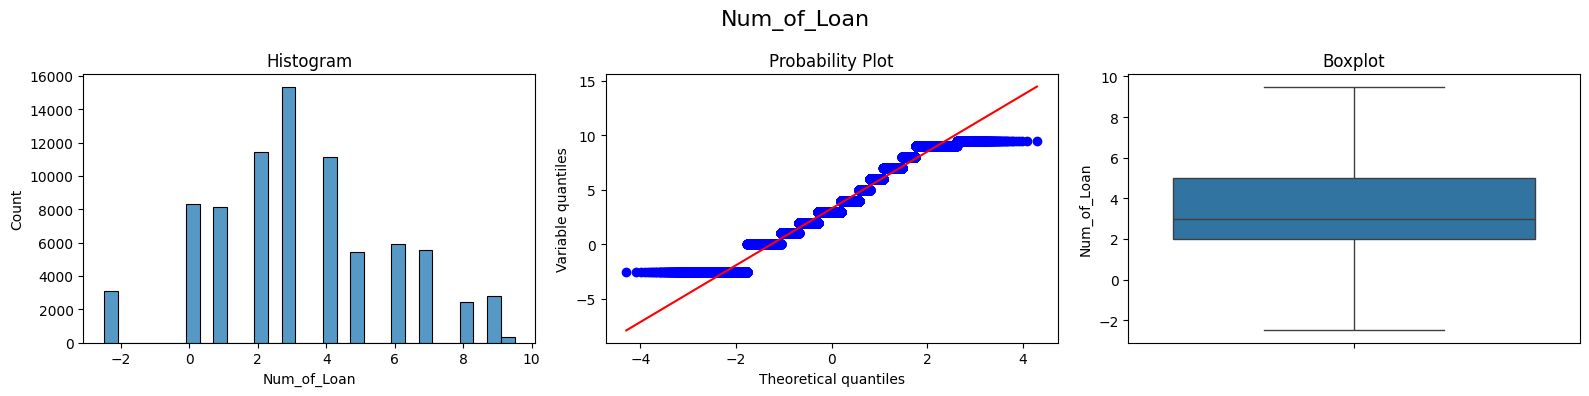

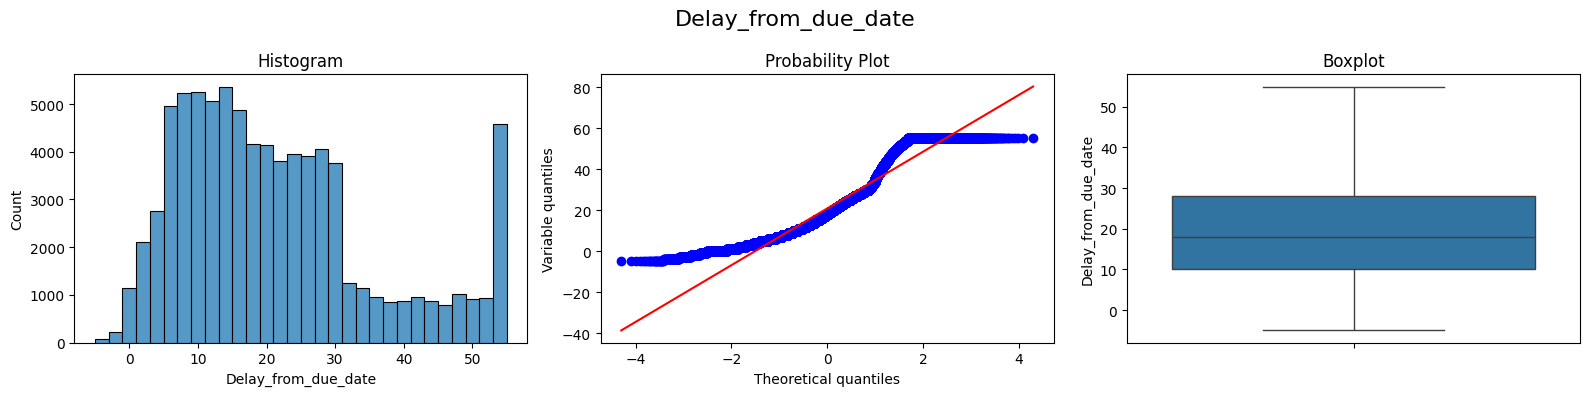

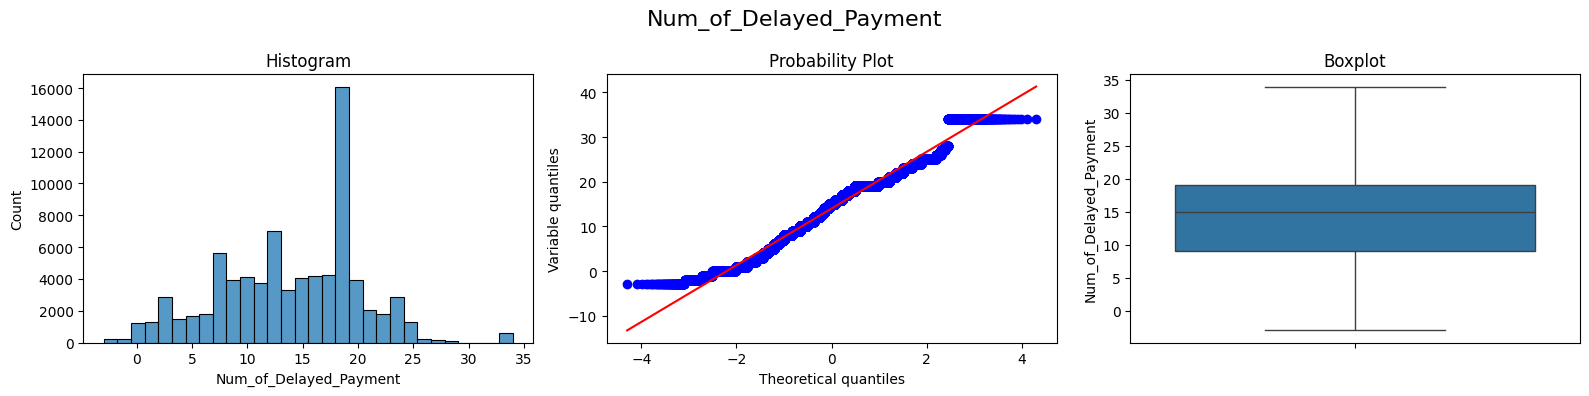

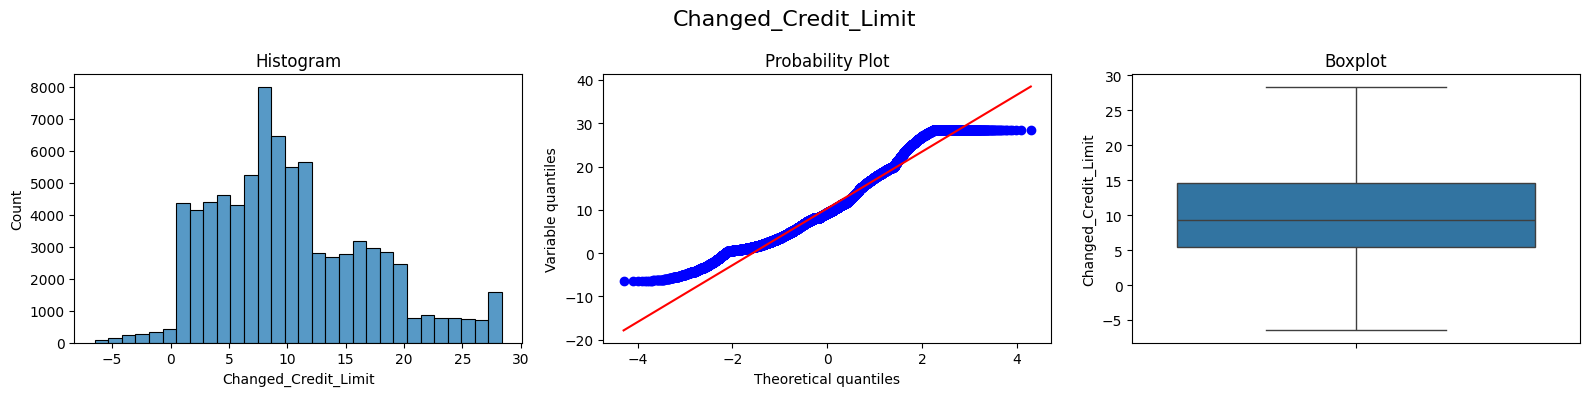

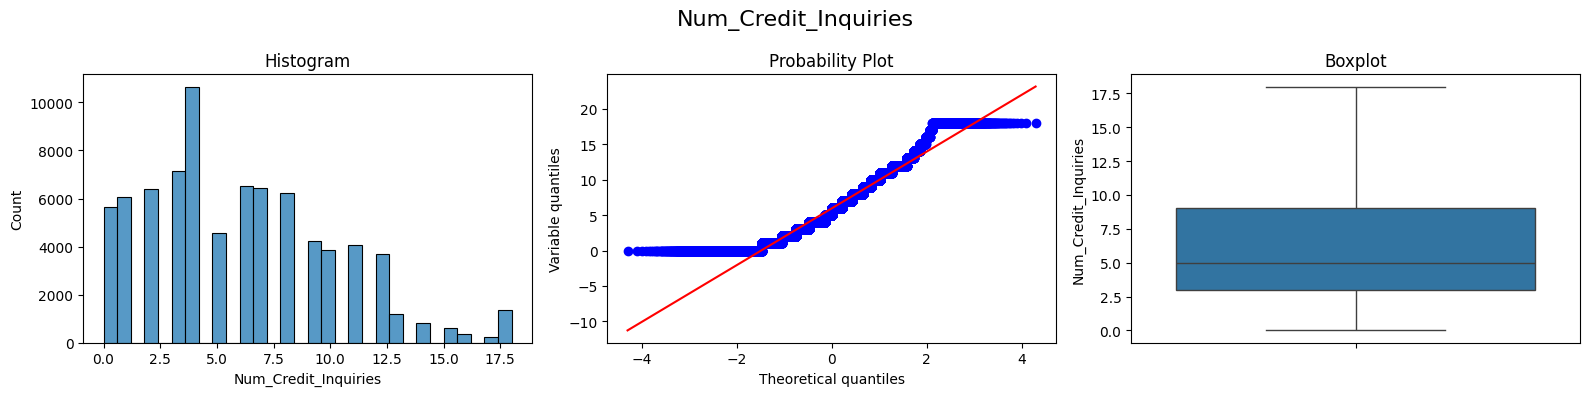

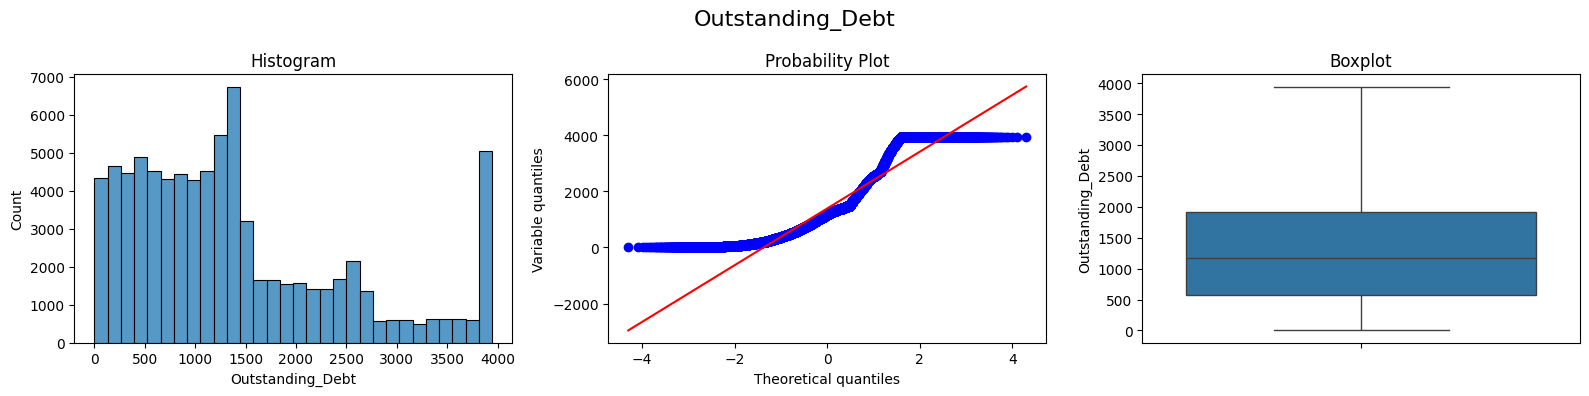

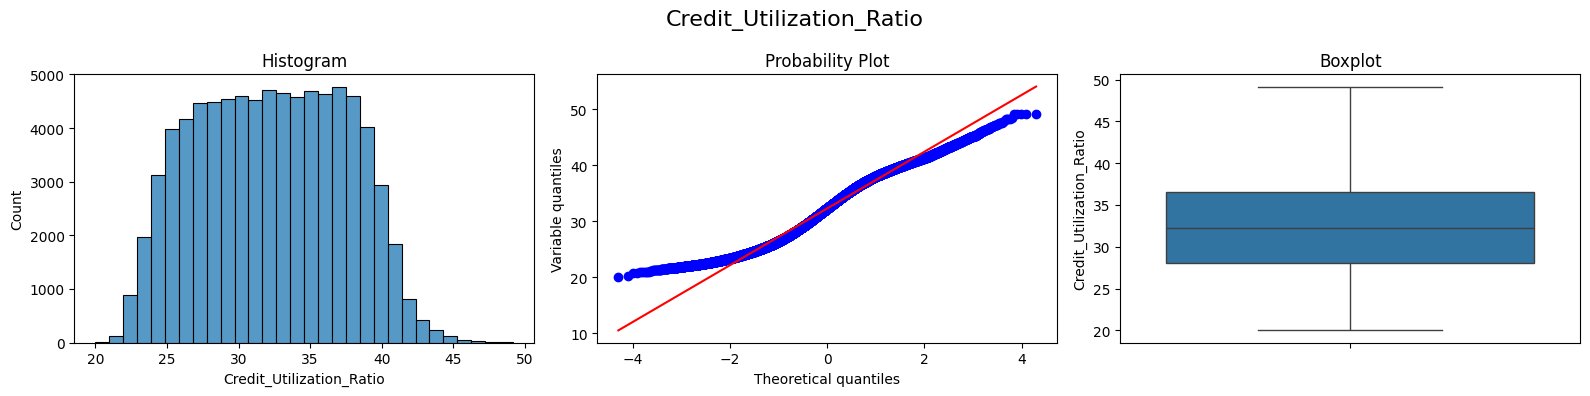

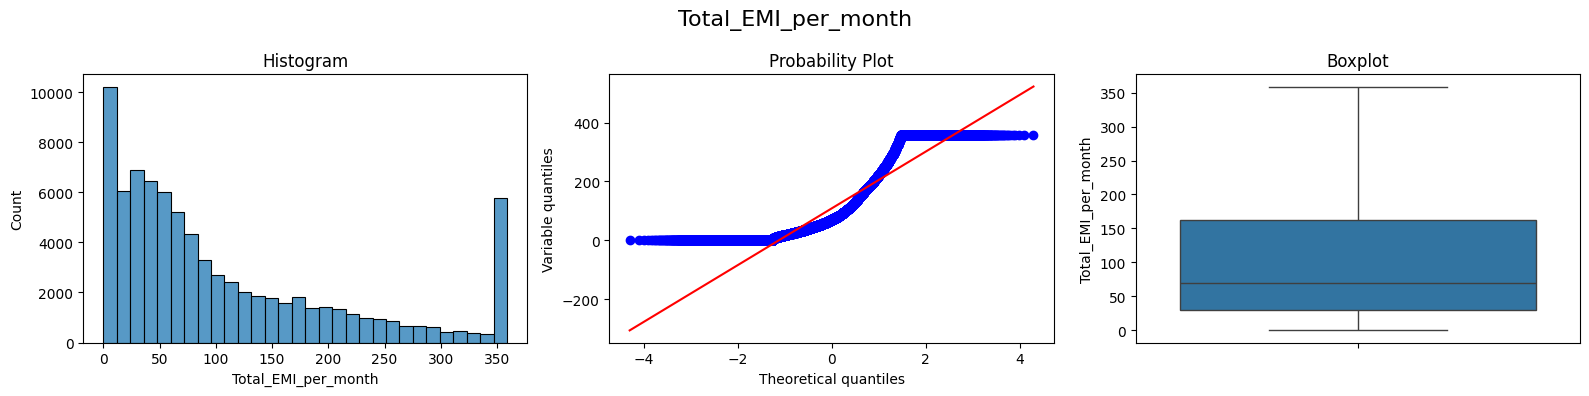

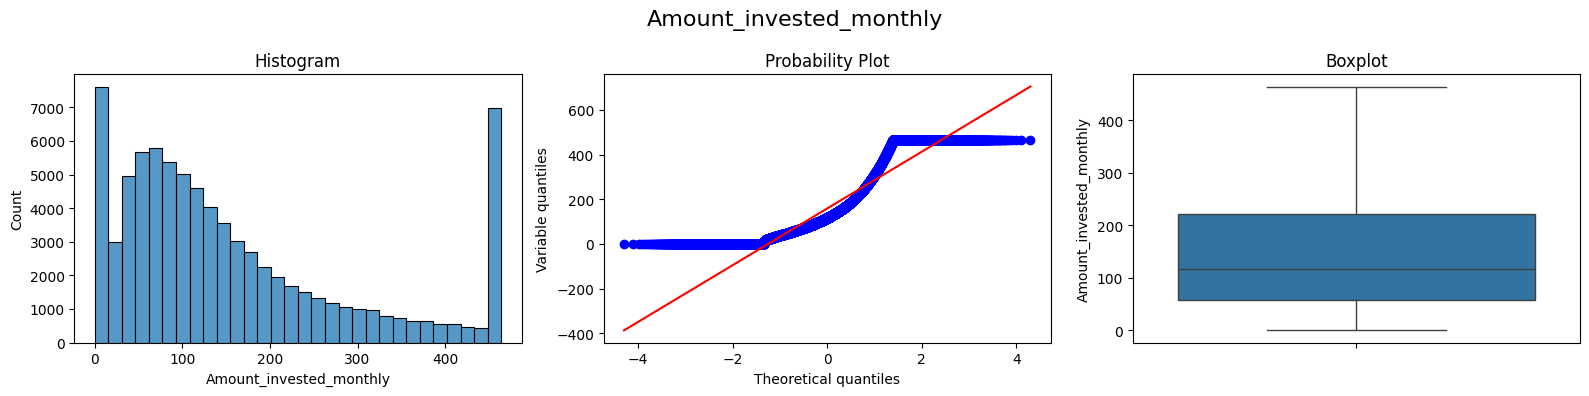

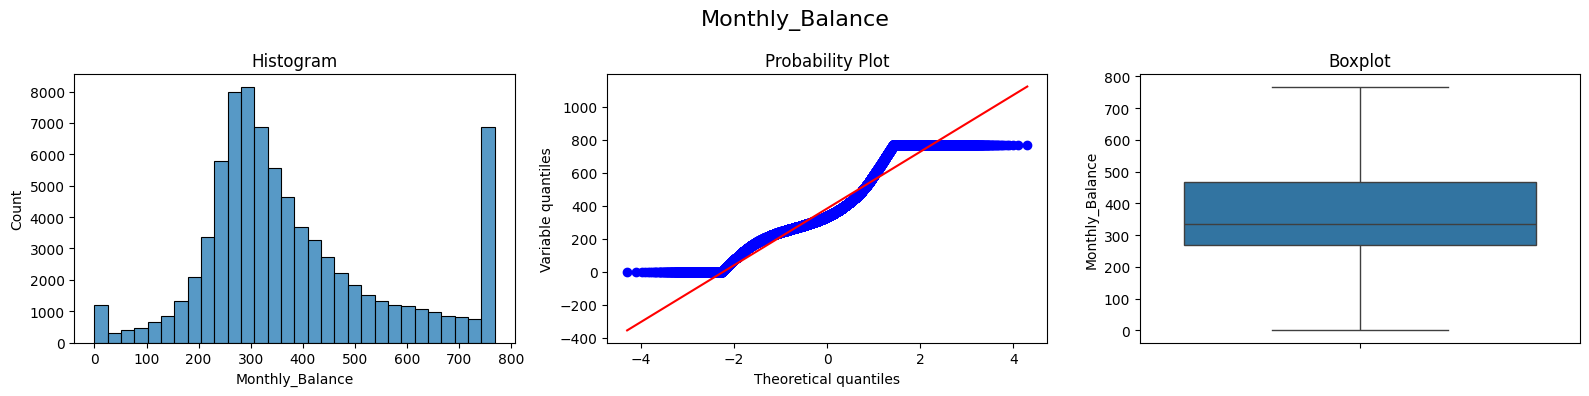

In [134]:
show_distribution_plots(train, numeric_columns)

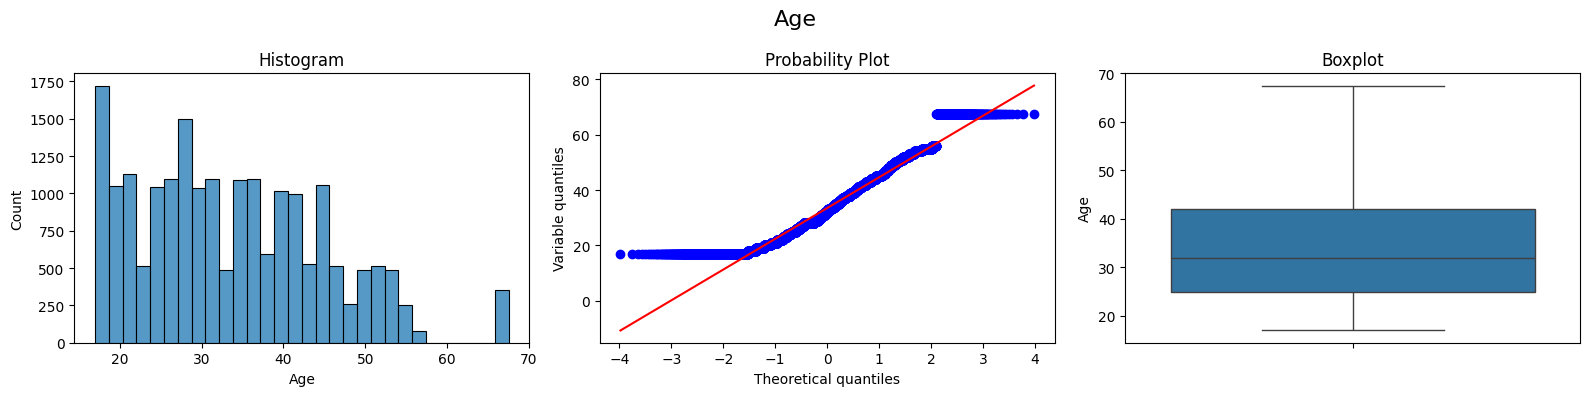

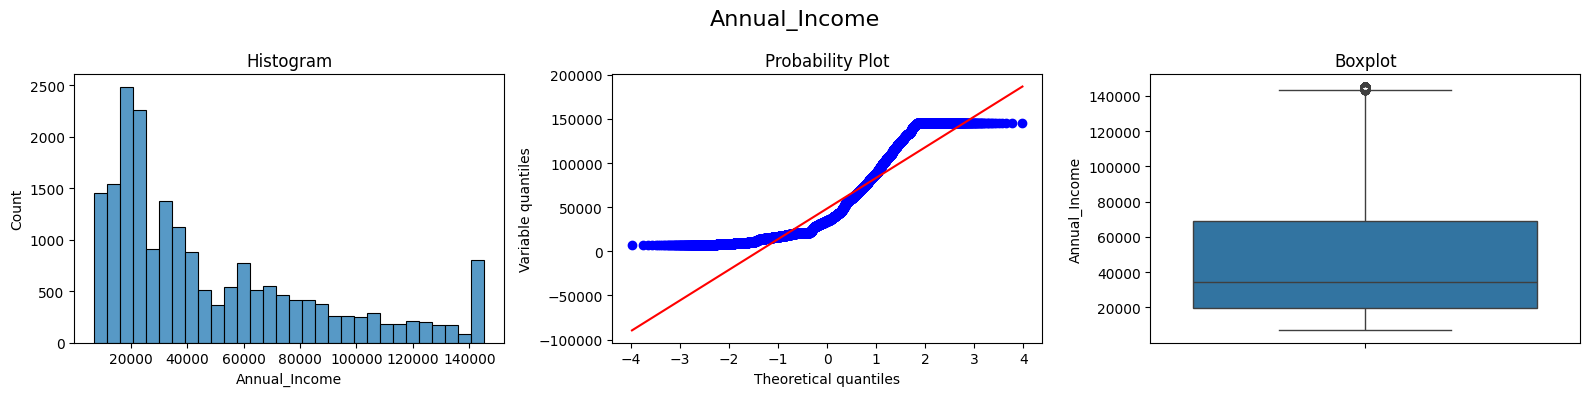

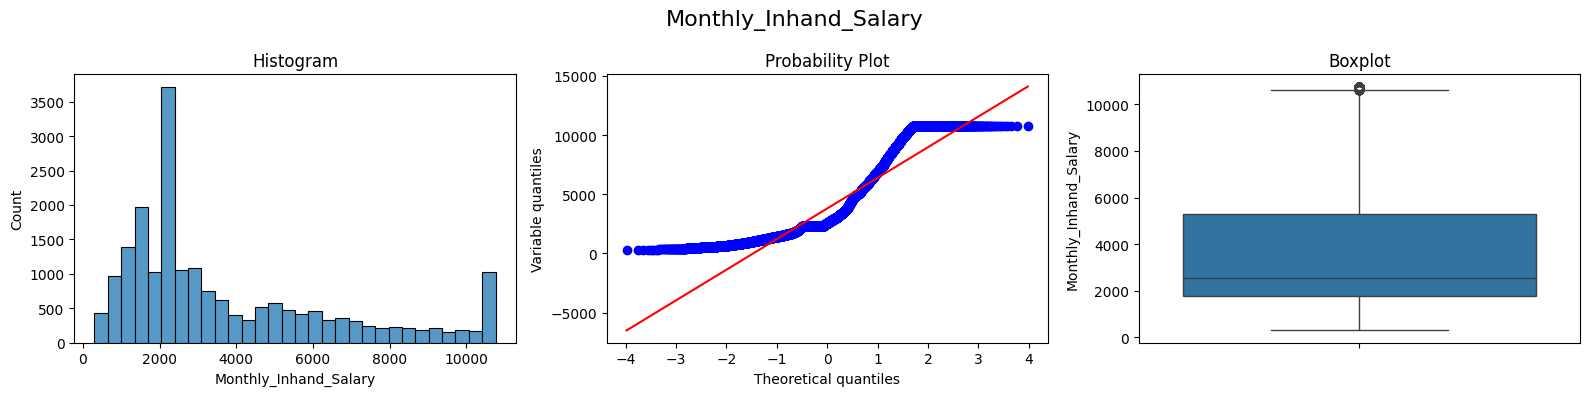

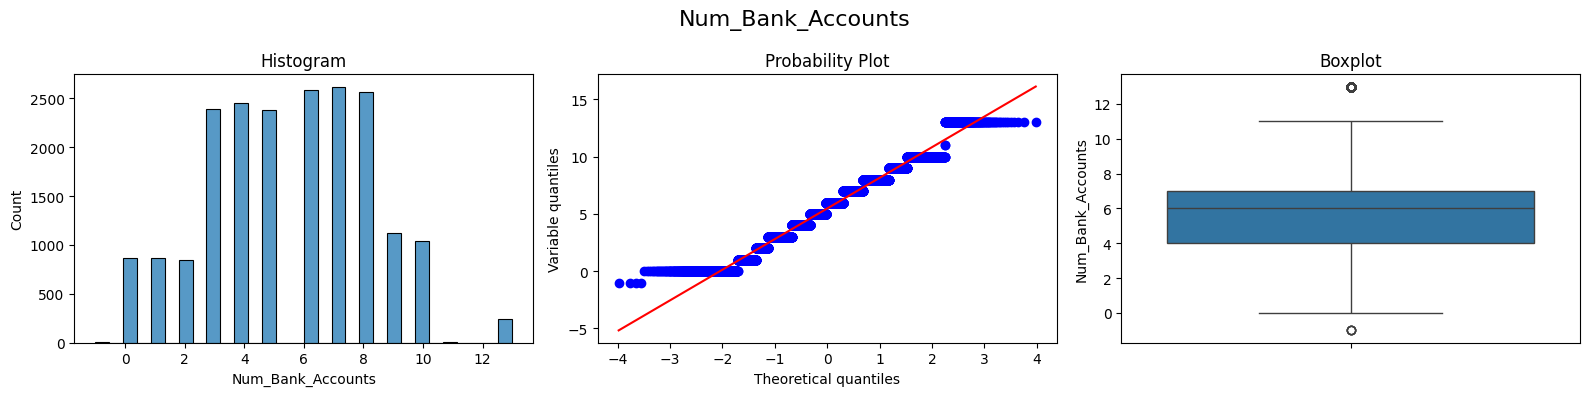

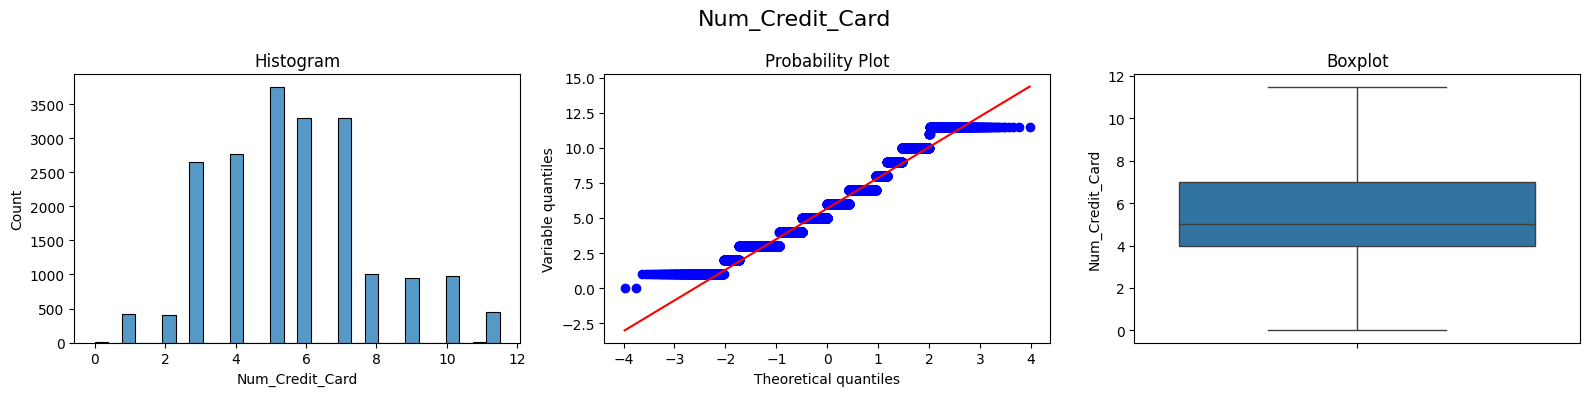

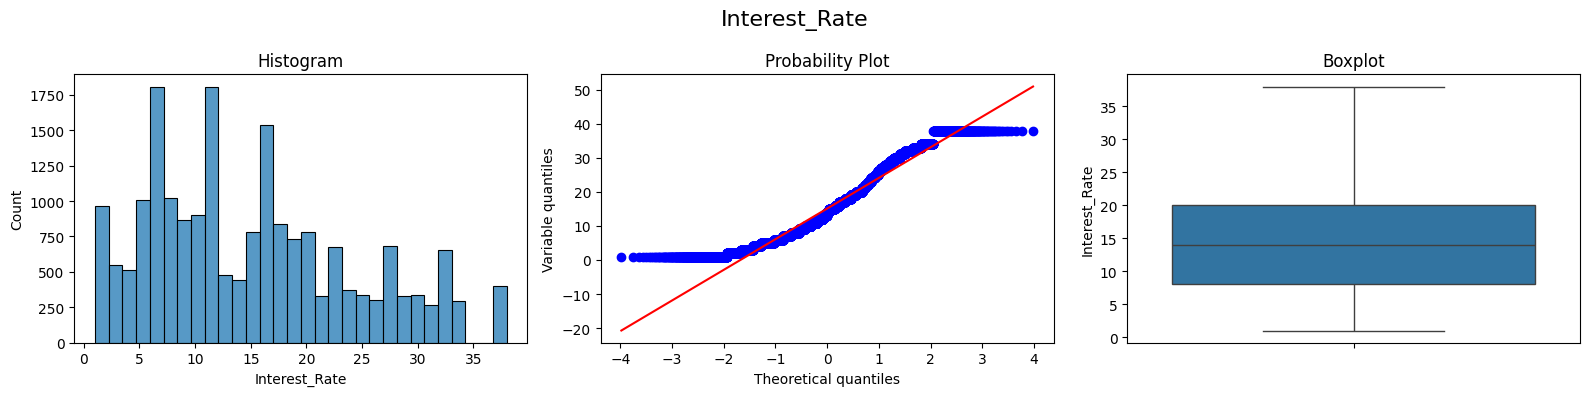

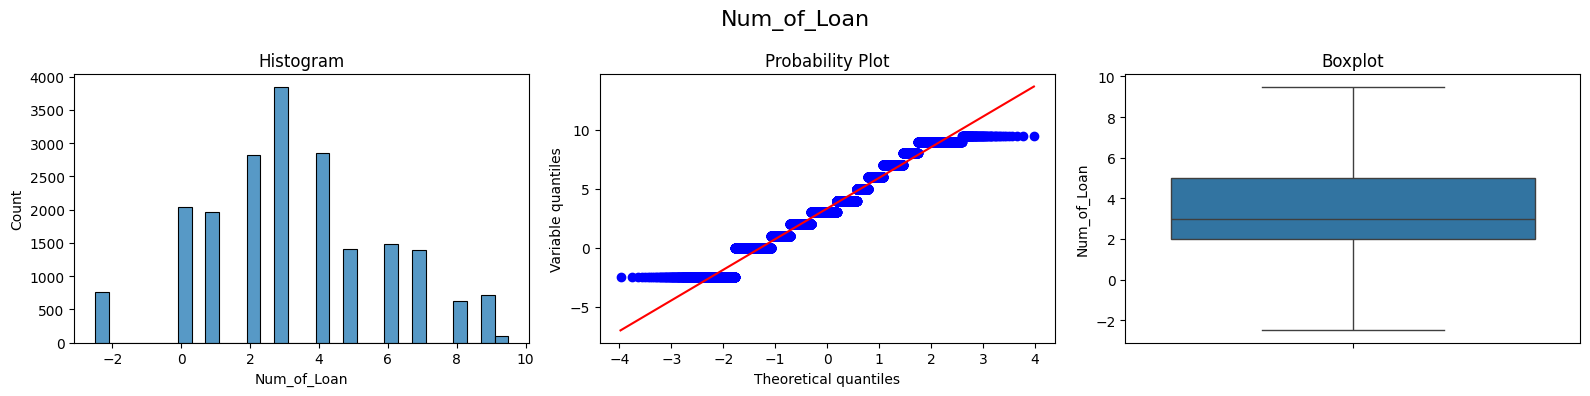

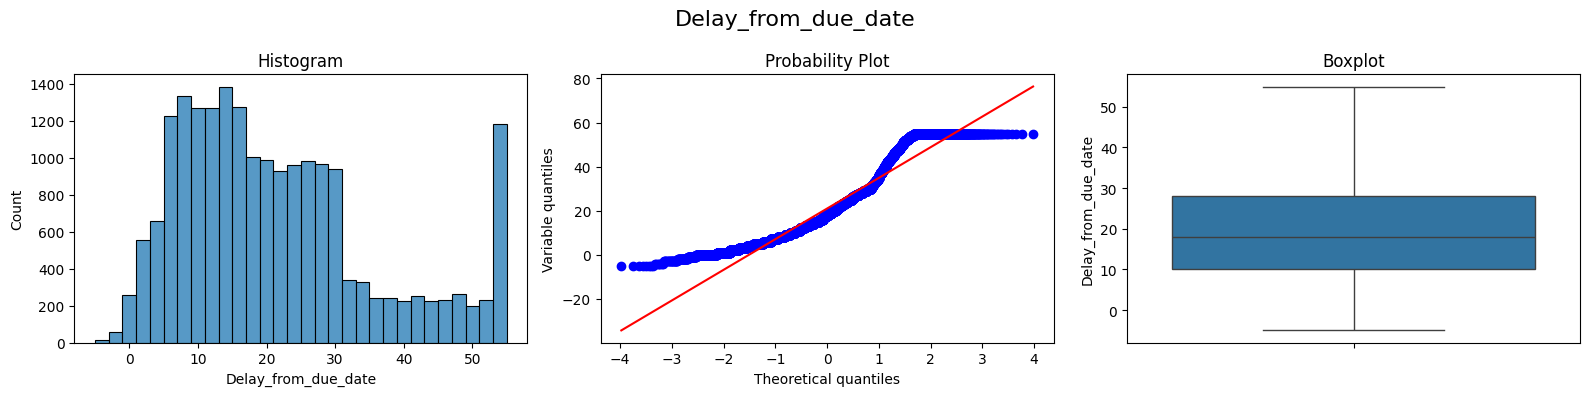

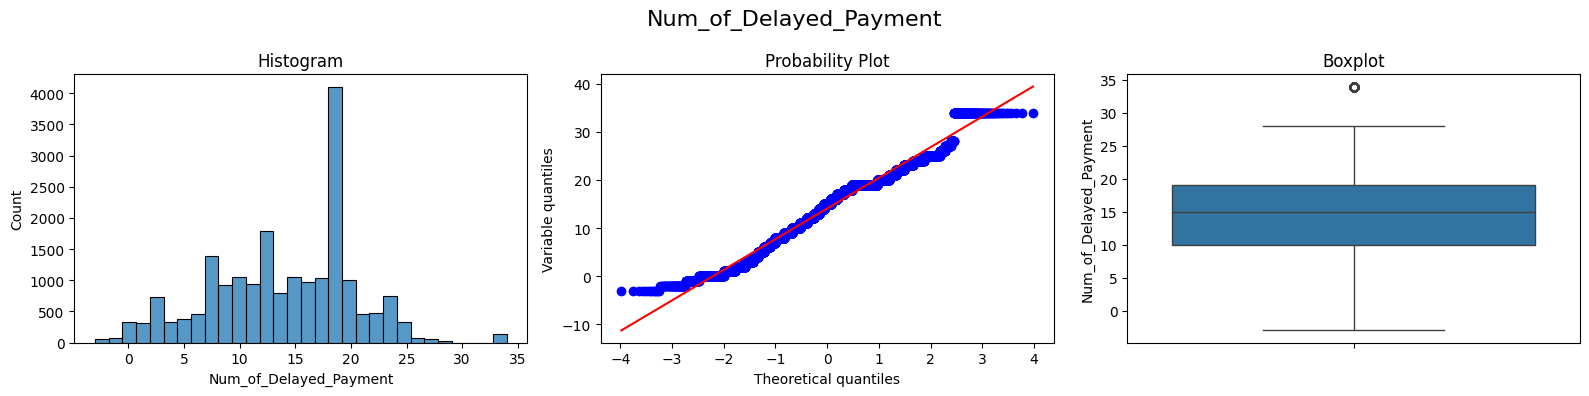

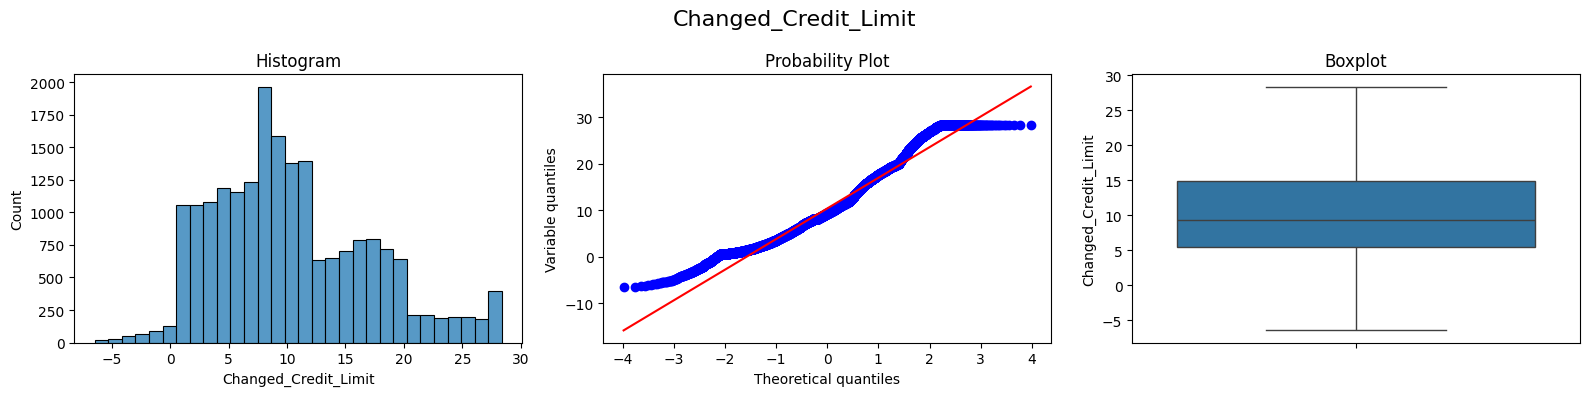

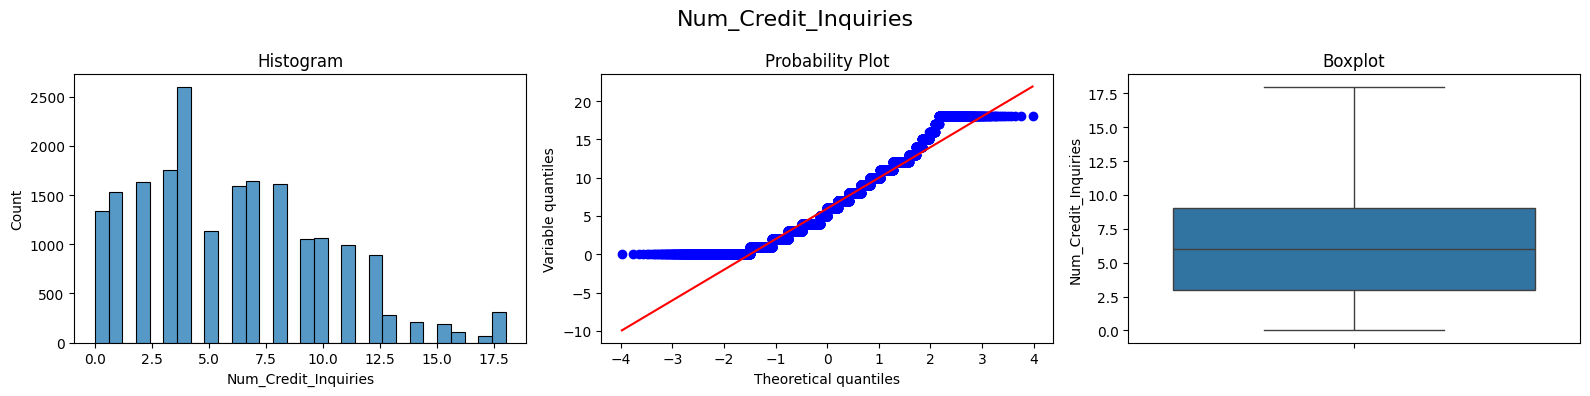

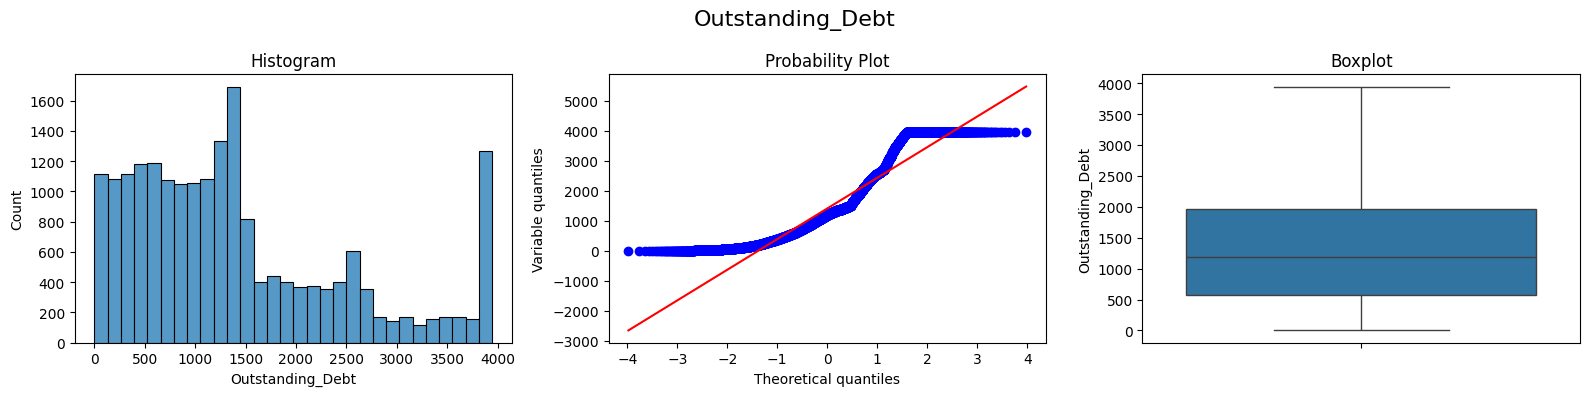

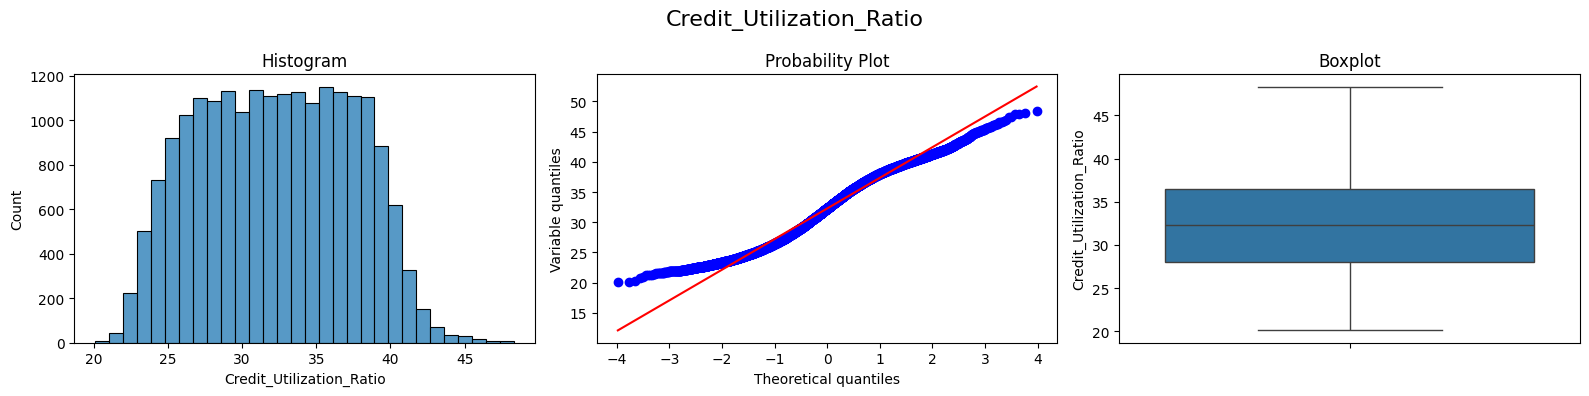

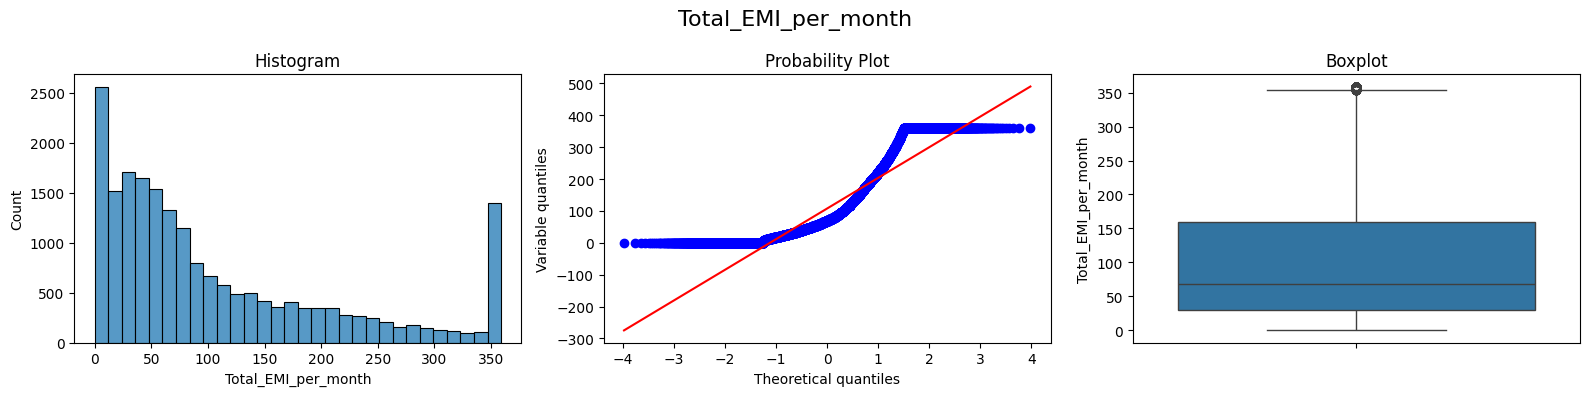

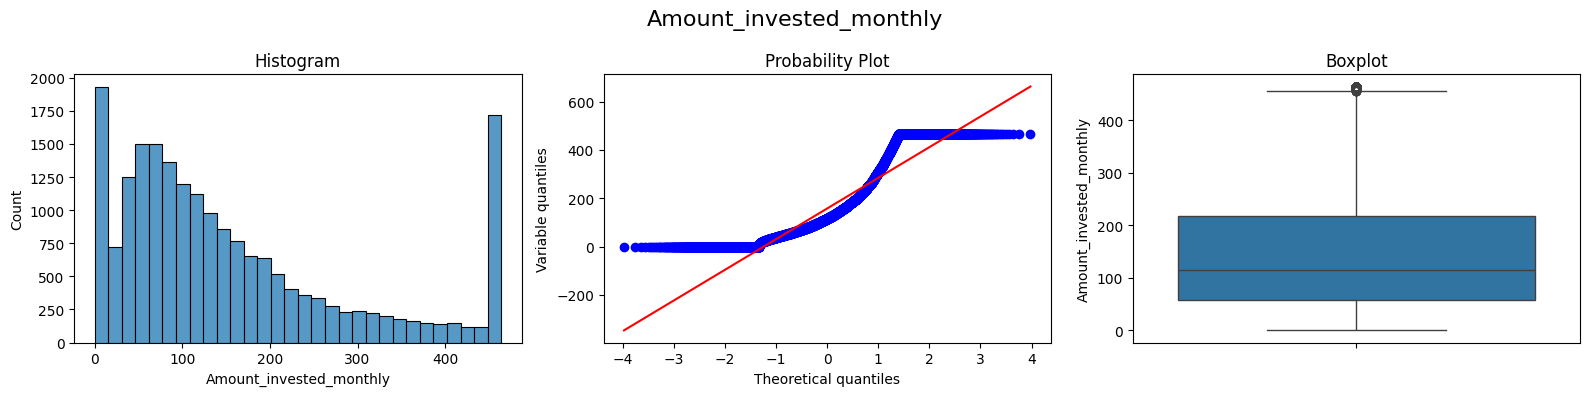

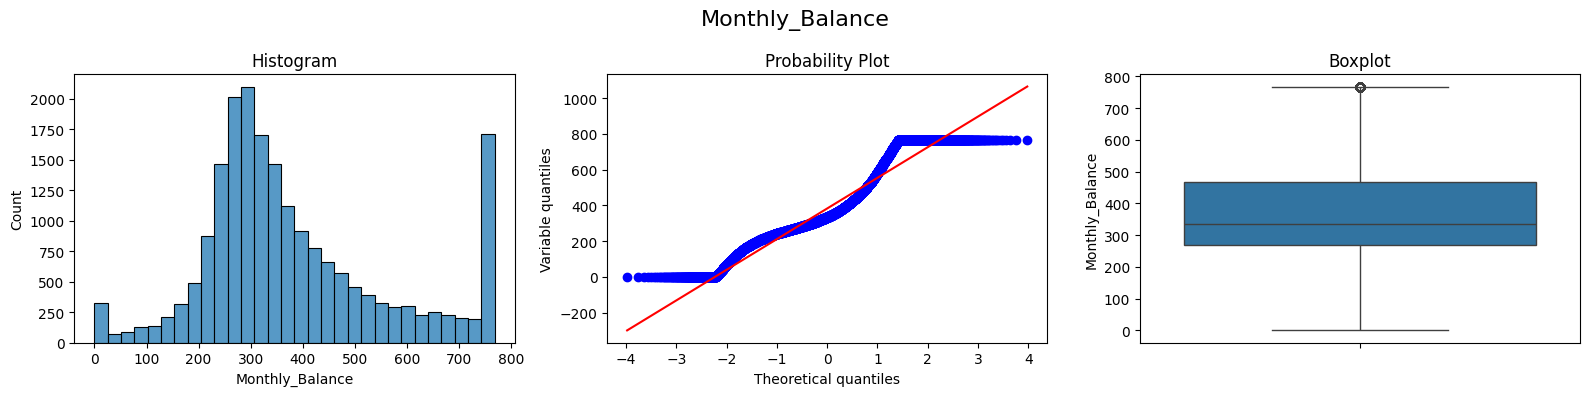

In [135]:
show_distribution_plots(test, numeric_columns)

## Hot Encoding

In [136]:
categorical_columns = train.select_dtypes(include=['object']).columns

categorical_columns

Index(['Occupation', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_Score'], dtype='object')

In [137]:
for column in categorical_columns:
    display(train[column].value_counts())

_______          5679
Lawyer           5302
Architect        5110
Engineer         5040
Scientist        5020
Media_Manager    5003
Accountant       5001
Mechanic         4997
Journalist       4962
Developer        4959
Teacher          4936
Entrepreneur     4931
Doctor           4846
Manager          4797
Musician         4730
Writer           4687
Name: Occupation, dtype: int64

Not Specified                                                                                                                                                                             10308
Personal Loan                                                                                                                                                                              1035
Credit-Builder Loan                                                                                                                                                                        1032
Debt Consolidation Loan                                                                                                                                                                    1018
Student Loan                                                                                                                                                                                978
Payday Loan                             

Low_spent_Small_value_payments      20313
High_spent_Medium_value_payments    14021
Low_spent_Medium_value_payments     11166
High_spent_Large_value_payments     11012
High_spent_Small_value_payments      9054
Low_spent_Large_value_payments       8347
!@9#%8                               6087
Name: Payment_Behaviour, dtype: int64

Standard    42575
Poor        23124
Good        14301
Name: Credit_Score, dtype: int64

Because all encoded data is categorical, we will use label encoding

In [138]:

# Combine categorical columns from both X_train and X_test
combined_data = pd.concat([train[categorical_columns], test[categorical_columns]], axis=0)

# Apply label encoding to the combined data

for col in categorical_columns:
    label_encoder = LabelEncoder()
    label_encoder.fit(combined_data[col])

    # Transform X_train and X_test using the fitted label encoders
    train[col] = label_encoder.transform(train[col])
    test[col] = label_encoder.transform(test[col])

In [139]:

train.head()

Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
ID                                                                
0x1cebe  20.0           6      101399.13            8535.927500   
0x134d9  25.0           0      112882.68            9684.890000   
0x11d78  49.0          12       28101.46            2173.463807   
0x6582   34.0           8       22438.27            1856.855833   
0x23551  28.0          10       20975.40            1943.950000   

         Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
ID                                                                        
0x1cebe                  1              3.0              2          2.0   
0x134d9                  5              1.0             10          4.0   
0x11d78                  5              7.0              8          3.0   
0x6582                   7              7.0              9          4.0   
0x23551                  2              3.0              9          1.0   

         Type_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
ID                                                                   
0x1cebe          3461                   14                     6.0   
0x134d9           981                   12                    10.0   
0x11d78          5746                   28                     8.0   
0x6582           2982                   16                    13.0   
0x23551             0                    2                     9.0   

         Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
ID                                                                      
0x1cebe                  4.97                   4.0           1061.06   
0x134d9                  6.24                   0.0            722.90   
0x11d78                  1.85                   4.0            454.67   
0x6582                  11.24                   3.0            167.57   
0x23551                  9.94                   1.0            731.40   

         Credit_Utilization_Ratio  Total_EMI_per_month  \
ID                                                       
0x1cebe                 42.681159           132.674897   
0x134d9                 40.090839           353.616124   
0x11d78                 23.607892           268.268012   
0x6582                  27.094189            58.436308   
0x23551                 26.205042            16.196792   

         Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  \
ID                                                                     
0x1cebe               114.299386                  2       768.035206   
0x134d9               166.446410                  1       688.426466   
0x11d78                 0.000000                  6       242.921080   
0x6582                105.165644                  4       292.083631   
0x23551                67.158201                  2       361.040007   

         Credit_Score  
ID                     
0x1cebe             2  
0x134d9             0  
0x11d78             0  
0x6582              2  
0x23551             0

In [140]:

test.head()

Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
ID                                                                
0x1d1af  30.0           8       43391.96            3688.996667   
0x1ebd6  18.0          12       14351.21            2295.058333   
0x8a66   41.0           2      130125.04           10766.042500   
0x1d769  35.0           8       20107.21            1631.600833   
0x236dd  27.0           3       92186.19            7487.182500   

         Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
ID                                                                        
0x1d1af                  1              5.0             10          0.0   
0x1ebd6                  8              7.0             18          6.0   
0x8a66                   5              2.0             11          2.0   
0x1d769                  6              6.0             32          2.0   
0x236dd                  1              2.0             12          4.0   

         Type_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
ID                                                                   
0x1d1af          3463                    9                     6.0   
0x1ebd6          3337                   18                    17.0   
0x8a66           3456                    3                     0.0   
0x1d769          1404                   15                    13.0   
0x236dd          4925                    1                     0.0   

         Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
ID                                                                      
0x1d1af                 10.72                   0.0        1468.28000   
0x1ebd6                 21.91                   9.0        3946.11875   
0x8a66                   3.82                  18.0        1195.05000   
0x1d769                 10.40                  11.0        2544.60000   
0x236dd                  9.74                   4.0         809.01000   

         Credit_Utilization_Ratio  Total_EMI_per_month  \
ID                                                       
0x1d1af                 29.112468             0.000000   
0x1ebd6                 39.849732            61.098718   
0x8a66                  21.542892           204.285650   
0x1d769                 32.423759            27.106395   
0x236dd                 39.543131           185.797654   

         Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  \
ID                                                                     
0x1d1af                53.969385                  1       554.930282   
0x1ebd6               118.080214                  6       238.314485   
0x8a66                463.949638                  6         0.007760   
0x1d769                66.819775                  6       359.233914   
0x236dd               115.520039                  2       697.400557   

         Credit_Score  
ID                     
0x1d1af             0  
0x1ebd6             1  
0x8a66              0  
0x1d769             1  
0x236dd             0

## Feature Scaling

In [141]:
# Perform feature scaling

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize only numerical values
for column in numeric_columns:
    # Fit and transform the numerical data for training data
    train[column] = scaler.fit_transform(train[[column]])
    # Transform the numerical data for test data using the same scaler
    test[column] = scaler.transform(test[[column]])

In [142]:
train.head()

Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
ID                                                                    
0x1cebe  0.059406           6       0.682478               0.786845   
0x134d9  0.158416           0       0.765506               0.896663   
0x11d78  0.633663          12       0.152524               0.178718   
0x6582   0.336634           8       0.111578               0.148456   
0x23551  0.217822          10       0.101001               0.156781   

         Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
ID                                                                        
0x1cebe           0.142857         0.260870       0.027027     0.375000   
0x134d9           0.428571         0.086957       0.243243     0.541667   
0x11d78           0.428571         0.608696       0.189189     0.458333   
0x6582            0.571429         0.608696       0.216216     0.541667   
0x23551           0.214286         0.260870       0.216216     0.291667   

         Type_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
ID                                                                   
0x1cebe          3461             0.316667                0.243243   
0x134d9           981             0.283333                0.351351   
0x11d78          5746             0.550000                0.297297   
0x6582           2982             0.350000                0.432432   
0x23551             0             0.116667                0.324324   

         Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
ID                                                                      
0x1cebe              0.328508              0.222222          0.268844   
0x134d9              0.364913              0.000000          0.183145   
0x11d78              0.239071              0.222222          0.115168   
0x6582               0.508241              0.166667          0.042409   
0x23551              0.470976              0.055556          0.185299   

         Credit_Utilization_Ratio  Total_EMI_per_month  \
ID                                                       
0x1cebe                  0.777555             0.369661   
0x134d9                  0.688754             0.985251   
0x11d78                  0.123686             0.747453   
0x6582                   0.243203             0.162816   
0x23551                  0.212721             0.045128   

         Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  \
ID                                                                     
0x1cebe                 0.246362                  2         1.000000   
0x134d9                 0.358760                  1         0.896346   
0x11d78                 0.000000                  6         0.316282   
0x6582                  0.226675                  4         0.380294   
0x23551                 0.144753                  2         0.470077   

         Credit_Score  
ID                     
0x1cebe             2  
0x134d9             0  
0x11d78             0  
0x6582              2  
0x23551             0

In [143]:
test.head()

Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
ID                                                                    
0x1d1af  0.257426           8       0.263077               0.323573   
0x1ebd6  0.019802          12       0.053108               0.190340   
0x8a66   0.475248           2       0.890171               1.000000   
0x1d769  0.356436           8       0.094724               0.126926   
0x236dd  0.198020           3       0.615867               0.686605   

         Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
ID                                                                        
0x1d1af           0.142857         0.434783       0.243243     0.208333   
0x1ebd6           0.642857         0.608696       0.459459     0.708333   
0x8a66            0.428571         0.173913       0.270270     0.375000   
0x1d769           0.500000         0.521739       0.837838     0.375000   
0x236dd           0.142857         0.173913       0.297297     0.541667   

         Type_of_Loan  Delay_from_due_date  Num_of_Delayed_Payment  \
ID                                                                   
0x1d1af          3463             0.233333                0.243243   
0x1ebd6          3337             0.383333                0.540541   
0x8a66           3456             0.133333                0.081081   
0x1d769          1404             0.333333                0.432432   
0x236dd          4925             0.100000                0.081081   

         Changed_Credit_Limit  Num_Credit_Inquiries  Outstanding_Debt  \
ID                                                                      
0x1d1af              0.493335              0.000000          0.372045   
0x1ebd6              0.814103              0.500000          1.000000   
0x8a66               0.295542              1.000000          0.302801   
0x1d769              0.484162              0.611111          0.644815   
0x236dd              0.465243              0.222222          0.204968   

         Credit_Utilization_Ratio  Total_EMI_per_month  \
ID                                                       
0x1d1af                  0.312394             0.000000   
0x1ebd6                  0.680488             0.170234   
0x8a66                   0.052893             0.569184   
0x1d769                  0.425911             0.075524   
0x236dd                  0.669977             0.517673   

         Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  \
ID                                                                     
0x1d1af                 0.116326                  1         0.722530   
0x1ebd6                 0.254511                  6         0.310284   
0x8a66                  1.000000                  6         0.000000   
0x1d769                 0.144024                  6         0.467726   
0x236dd                 0.248993                  2         0.908031   

         Credit_Score  
ID                     
0x1d1af             0  
0x1ebd6             1  
0x8a66              0  
0x1d769             1  
0x236dd             0

## Modelling

In [144]:
#split dataset to X_train, y_train, X_test, y_test
X_train = train.drop(columns=['Credit_Score'])
y_train = train['Credit_Score']
X_test = test.drop(columns=['Credit_Score'])
y_test = test['Credit_Score']



We will use 3 models:

- Logistic Regression
- KNN
- Decision tree

In [145]:
y_train.value_counts(normalize=True)

2    0.532188
1    0.289050
0    0.178762
Name: Credit_Score, dtype: float64

In [146]:
class_weight = y_train.value_counts(normalize=True).to_dict()
class_weight

{2: 0.5321875, 1: 0.28905, 0: 0.1787625}

In [147]:
logistic_model = LogisticRegression(
    random_state = 42,
    class_weight = class_weight
)

In [148]:
knn_clf = KNeighborsClassifier()
# there is not a class weight in KNN

In [149]:
dt_clf = DecisionTreeClassifier(
    random_state = 42,
    class_weight = class_weight
)

## Fitting Model To Data

In [150]:
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.1787625, 1: 0.28905, 2: 0.5321875},
                   random_state=42)

In [151]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [152]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1787625, 1: 0.28905, 2: 0.5321875},
                       random_state=42)

## Model Evaluation

In [153]:
y_train.shape

(80000,)

In [154]:
y_test.shape

(20000,)

In [155]:

def extract_multilabel_confusion_metrics(multi_label_confusion_matrix):
    # Extract FN, TN, FP, TP for each class
    for i, confusion_matrix in enumerate(multi_label_confusion_matrix, start=1):
        # print(confusion_matrix)
        TN = confusion_matrix[0, 0]
        FP = confusion_matrix[0, 1]
        FN = confusion_matrix[1, 0]
        TP = confusion_matrix[1, 1]
    return TP, FP, TN, FN


def evaluate(model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')



    confusion_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
    tp, fp, tn, fn = extract_multilabel_confusion_metrics(confusion_matrix)
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))

    y_pred = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')

    confusion_matrix = multilabel_confusion_matrix(y_test, y_pred)
    tp, fp, tn, fn = extract_multilabel_confusion_metrics(confusion_matrix)
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

In [156]:
#logistic regression
logreg_pred = logistic_model.predict(X_test)

# knn prediction
knn_pred = knn_clf.predict(X_test.values)

# decision tree prediction
dc_pred = dt_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Logistic Regression Evaluation

In [157]:
evaluate(logistic_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14301
           1       0.63      0.02      0.03     23124
           2       0.53      1.00      0.69     42575

    accuracy                           0.53     80000
   macro avg       0.39      0.34      0.24     80000
weighted avg       0.47      0.53      0.38     80000

------
Assuming 1 as positive, we get for Data Train:

True Positive: 42369
True Negative: 363
False Positive: 37062
False Negative: 206

Accuracy Data Train: 0.5341125
Precision Data Train: 0.5334063526834611
Recall Data Train: 0.9951614797416324
F1-Score Data Train: 0.6945396128059276


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3527
           1       0.63      0.02      0.03      5874
           2       0.53      0.99      0.69     10599

    accuracy                           0.53     20000
   macro avg       0.39      0.34      0.24     20000
weighted avg       0.47      0.53      0.38     20000

------
Assuming 1 as positive, we get:

True Positive: 10541
True Negative: 100
False Positive: 9301
False Negative: 58

Accuracy: 0.532
Precision Data Test: 0.5312468501159158
Recall Data Test: 0.9945277856401548
F1-Score Data Test: 0.6925528070694129


### KNN Evaluation

In [158]:
evaluate(knn_clf, x_test = X_test.values, y_test = y_test, x_train=X_train.values, y_train=y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.70      0.68      0.69     14301
           1       0.78      0.78      0.78     23124
           2       0.82      0.82      0.82     42575

    accuracy                           0.79     80000
   macro avg       0.77      0.76      0.76     80000
weighted avg       0.79      0.79      0.79     80000

------
Assuming 1 as positive, we get for Data Train:

True Positive: 34981
True Negative: 29533
False Positive: 7892
False Negative: 7594

Accuracy Data Train: 0.785875
Precision Data Train: 0.8159214423996455
Recall Data Train: 0.8216324133881385
F1-Score Data Train: 0.818766969384889


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.52      0.49      0.50      3527
           1       0.66      0.65      0.66      5874
           2       0.71      0.73      0.72     10599

    accuracy                           0.66     20000
   macro avg       0.63      0.62      0.63     20000
weighted avg       0.66      0.66      0.66     20000

------
Assuming 1 as positive, we get:

True Positive: 7688
True Negative: 6218
False Positive: 3183
False Negative: 2911

Accuracy: 0.66295
Precision Data Test: 0.707202649250299
Recall Data Test: 0.7253514482498349
F1-Score Data Test: 0.7161620866325104


## Decusion Tree Evaluation

In [159]:
evaluate(dt_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14301
           1       1.00      1.00      1.00     23124
           2       1.00      1.00      1.00     42575

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

------
Assuming 1 as positive, we get for Data Train:

True Positive: 42575
True Negative: 37425
False Positive: 0
False Negative: 0

Accuracy Data Train: 1.0
Precision Data Train: 1.0
Recall Data Train: 1.0
F1-Score Data Train: 1.0
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.58      0.60      0.59      3527
           1       0.67      0.67      0.67      5874
           2       0.72      0.70      0.71     10599

    accuracy                           0.68     2000

In [160]:
#

## Conclution

To get the best model, we will evaluate the F1 Score

let's plt the F1 Score of each model both train and tes data!

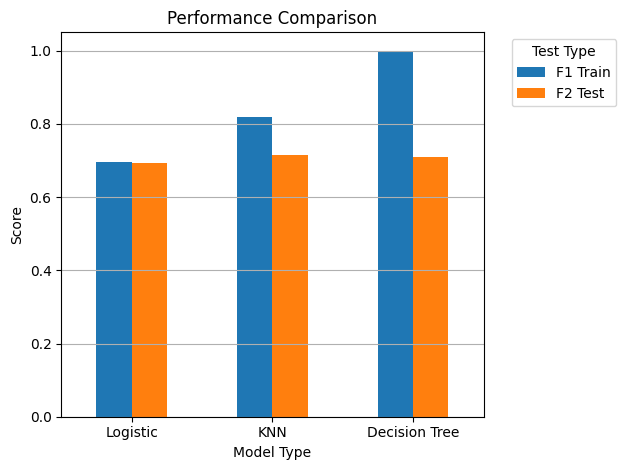

In [161]:

# Create a DataFrame
data = {'Logistic': [0.6945396128059276, 0.6925528070694129],
        'KNN': [0.818766969384889, 0.7161620866325104],
        'Decision Tree': [1.0, 0.7105526203055834]
        }
index = ['F1 Train', 'F2 Test']
df = pd.DataFrame(data, index=index)

# Transpose the DataFrame
df = df.T  # Transpose the DataFrame

# Plot the bar chart
df.plot(kind='bar', rot=0)  # rot=0 for horizontal x-axis labels
plt.title('Performance Comparison')
plt.xlabel('Model Type')
plt.ylabel('Score')
plt.legend(title='Test Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')  # grid lines only on the y-axis
plt.tight_layout()  # adjust layout to prevent clipping of labels
plt.show()

The bar chart above illustrates the F1 scores for logistic regression, decision tree, and KNN models on both the training and test datasets. It reveals that logistic regression exhibits relatively low F1 scores for both the train and test datasets. This observation suggests that the model suffers from high bias but low variance. In the context of credit scoring, this implies that the logistic regression model may oversimplify the relationship between predictor variables and credit scores, resulting in consistent but potentially inaccurate predictions.

On the other hand, the decision tree model demonstrates higher F1 scores on the training dataset compared to the test dataset. This discrepancy indicates that the model has high variance, meaning it is overly sensitive to fluctuations in the training data and may not generalize well to unseen data. In the context of credit scoring, this suggests that the decision tree model may have memorized patterns specific to the training data, leading to poorer performance on new data.

Conversely, the KNN model exhibits relatively consistent F1 scores between the training and test datasets, with slightly higher scores overall. This consistency suggests that the model strikes a balance between bias and variance, making it a suitable candidate for credit scoring tasks.

Based on these observations, we conclude that the KNN model serves as the most promising baseline model for credit scoring, as it demonstrates favorable performance characteristics on both the training and test datasets.


## Hyperparameter Tuning

Continue...